In [3552]:
from dotenv import load_dotenv
import os

load_dotenv()  # load variables from .env file
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Load tables & images

In [3553]:
import pandas as pd
from pathlib import Path

DATA_PATH = '../competitors-xgb/data'
file_path = (
    Path(DATA_PATH) / 'tables_OZ_geo_5500' /
    'processed' / 'OZ_geo_5500.csv'
)
full_df = pd.read_csv(file_path) 
full_df.shape

(5562, 6)

In [3554]:
import pandas as pd
from pathlib import Path

DATA_PATH = '../competitors-xgb/data'
IMAGES_DIR = (
    Path(DATA_PATH) / 'images_OZ_geo_5500'
)

In [3555]:
pd.set_option('display.max_colwidth', None)
sample = full_df.sample(1)
display(sample[['sku']])
display(sample[['name']])
display(sample[['description']])

,sku
4432,679295196


,name
4432,настенная карта Нижегородской области 140 х 125 см (на холсте)


,description
4432,"Карта отображает современное (сентябрь 2022 г.) административно-территориальное устройство Нижегородской области:<ul><li>все населенные пункты</li><li>автомобильные, железные дороги и станции, аэропорты</li><li>административное устройство Нижегородской области</li><li>лесные, водные объекты, особо охраняемые природные территории</li><li>число жителей в населенных пунктах свыше 1 тыс. чел.</li><li>координатная сетка, отмывка рельефа и др.</li></ul>Карта Нижегородской области отпечатана на натуральном холсте (предусмотрены поля по периметру), такую карту можно обрамить багетом, смонтировать на подрамник, либо просто повесить на стену. Масштаб 1 : 300 000 (в 1 см 3 км)."


In [3556]:
# Fill NaN for descriptions
full_df.description = full_df.description.fillna('')
full_df.name.isna().sum(), full_df.description.isna().sum()

(np.int64(0), np.int64(0))

In [3557]:
full_df['name_and_description'] = full_df['name'] + '.\n' + full_df['description']
full_df[['name_and_description']].head(1)

,name_and_description
0,"Карты МИРА и РОССИИ настенные политические,160х102 см, Комплект школьных карт для детей / 2024 г.\nПредставляем вашему вниманию уникальный набор карт, состоящий из Географической карты России и Настенной карты мира. Каждая карта имеет размер 102х160 см и масштаб 1:5 500 000 для России и 1:22 000 000 для мира. Эти современные издания 2024 года отражают актуальные изменения с новыми границами и помогут вам в образовательных целях, декоре и повседневной жизни.\nГеографическая карта России — идеальный помощник для школьников и любителей географии. Она прекрасно иллюстрирует все регионы страны, их особенности и природные зоны. Настенная карта России характеризуется четкой и детализированной графикой, что делает её удобной для изучения. Эта физическая карта позволяет лучше понять разнообразие природных зон России и узнать о местной флоре и фауне. Яркие цвета и четкие обозначения обеспечивают высокую читаемость, что позволяет легко находить нужные области и изучать их.\nНастенная карта мира станет отличным выбором для образовательных целей и домашнего использования. Она помогает изучать страны, их границы и столицы, развивая пространственное мышление. Политическая карта мира выполнена в ярких цветах и с четкими границами, включая моря, океаны и флаги стран. Она подойдет как для школьных кабинетов, так и для стильного оформления интерьера вашего дома.\nОбъединяя два товара, совместите полезное с эстетическим — карты можно использовать как современные учебные пособия для школьников и взрослых, а также как элементы декора. Этот набор станет прекрасным подарком на 1 сентября, Новый год и другие праздники. Ламинированная поверхность защищает карты от повреждений, делая их долговечными и удобными для использования.\nВыбирая набор карт, вы обеспечиваете полезный и функциональный инструмент для изучения нашей страны и мира, что делает их незаменимыми в учебном процессе и повседневной жизни."


In [3558]:
# Посмотрим на различные типы карт у целевого продавца
full_df[full_df['seller'] == 'ИНТЕРТРЕЙД'][['name']]

,name
0,"Карты МИРА и РОССИИ настенные политические,160х102 см, Комплект школьных карт для детей / 2024 г"
1,"Схема линий скоростного транспорта Москвы (Метро, МЦК, МЦД) 0,5*0,7 м, ламинированная"
2,"Политическая карта МИРА 160х109 см, Карта мира настенная, подарок для школьника"
3,"Политическая карта МИРА настенная, 100х70см, школьная географическая карта мира, Выпуск 2024 год, В ТУБУСЕ"
4,"Политическая карта МИРА настенная, 160х102см, карта мира по географии, Выпуск 2024 год, В ТУБУСЕ"
5,"Карта России настенная, 102х160 см, карта России по географии, Выпуск 2024 год, В ТУБУСЕ"
6,"Карта России настенная политическая, в тубусе 100х70см, Карта России настенная"
7,"Политическая карта МИРА настенная, 100х70см, новые границы, выпуск 2024 год"
5241,"Настенная карта Москвы 2024, Карта Москвы, с линиями метро, 102х143 см"
5242,"Карта Москвы и Московской области настенная 143х102см, административная карта столицы России"


## Take samples

In [3559]:
import pandas as pd

# SEED = 42
SEED = 24

# N_SAMPLES_PER_PATTERN = 5
N_SAMPLES_PER_PATTERN = 10

PATTERN_SET_ID = 4

PATTERN_SETS = {
    0: [
        r'карта москвы',
        r'карта.*санкт',
        r'карта.*ретро',
    ],
    
    1: [
        r'Физическая карта России',
        r'Политико-административная карта России',
        r'Политическая карта России',
        r'административная карта России',
    ],
    
    2: [
        r'Физическая карта России|карта России Физическая',
        r'Физическая карта мира|карта мира физическая',
    ],

    3: [
        r'транспорт.*москвы|путеводитель.*москв|москв.*метро',
        r'Карта.*Московской области',
        r'карта.*россии'
    ],

    4: [
        r'Физическая карта России|карта России Физическая',
        r'карта\sРоссии(?:\s(?:Политическая|административная|Политико-административная))?',
        r'карта.*(?:природн|животн|растит)',
        r'карта.*(?:област|муниципальн|округ)'
    ],

    # 5: [
    #     r'карта.*(?:природн|животн|растит)',
    #     r'карта.*(?:област|муниципальн|округ)'
    #     r'Физическая карта России|карта России Физическая',
    #     r'карта\sРоссии(?:\s(?:Политическая|административная|Политико-административная))?',
    # ],
}

################################################################

PATTERNS = PATTERN_SETS[PATTERN_SET_ID]

samples = []
for i, pat in enumerate(PATTERNS):
    subset = full_df[full_df['name'].str.contains(pat, case=False, na=False)].copy()
    subset['group_id'] = i
    subset['group_pattern'] = pat
    if not subset.empty:
        n = min(N_SAMPLES_PER_PATTERN, len(subset))
        samples.append(subset.sample(n=n, random_state=SEED))
        
sample_df = pd.concat(samples, ignore_index=True)
len(sample_df)

40

In [3560]:
# Define and test function to get .csv input for the model

def get_input(df, col):
    pd.reset_option('display.max_colwidth')
    print("Input table to .csv:")
    input = df[['sku', 'seller', col]]
    display(input.head(1))
    print("Input symbols count in .csv:", len(input.to_csv(index=False)))
    return input.to_csv(index=False)

In [3561]:
input_names_descriptions = get_input(sample_df, 'name_and_description')

Input table to .csv:


,sku,seller,name_and_description
0,958897165,Shop-Profit,"Настенная физическая карта России Brauberg, 10..."


Input symbols count in .csv: 36834


In [3562]:
input_names = get_input(sample_df, 'name')

Input table to .csv:


,sku,seller,name
0,958897165,Shop-Profit,"Настенная физическая карта России Brauberg, 10..."


Input symbols count in .csv: 4792


## (optional) Visualize groups

In [3563]:
import math
import textwrap
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pathlib import Path
from PIL import Image

def plot_samples_grid_by_group(
    df,
    images_dir,
    image_col='image_name',
    sku_col='sku',
    name_col='name',
    ncols=3,
    figsize=(12, 8),
    name_fontsize=9,
    name_wrap_width=30,
    name_y_offset=-0.08,
    sku_fontsize=10,
    sku_y=1.02,
    border_color='black',
    border_width=1
):
    """
    For each (group_id, group_pattern), plot a grid of images
    showing SKU above and soft‑wrapped product name below each image,
    with a small black border around each image.
    """
    images_dir = Path(images_dir)

    for (gid, pattern), group in df.groupby(['group_id','group_pattern']):
        n = len(group)
        nrows = math.ceil(n / ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
        axes = axes.flatten()

        for ax, (_, row) in zip(axes, group.iterrows()):
            sku = str(row[sku_col])
            name = str(row[name_col])

            # SKU above
            ax.text(
                0.5, sku_y, sku,
                ha='center', va='bottom',
                transform=ax.transAxes,
                fontsize=sku_fontsize,
                fontweight='bold'
            )

            # plot image
            img_path = images_dir / row[image_col]
            if img_path.exists():
                ax.imshow(Image.open(img_path))
                # add a small black border around the image
                ax.add_patch(
                    Rectangle(
                        (0, 0), 1, 1,
                        transform=ax.transAxes,
                        fill=False,
                        edgecolor=border_color,
                        linewidth=border_width
                    )
                )
            else:
                ax.text(0.5, 0.5, '❌\nImage\nnot found',
                        ha='center', va='center', wrap=True)

            # hide ticks
            ax.set_xticks([]); ax.set_yticks([])
            # hide default spines
            for spine in ax.spines.values():
                spine.set_visible(False)

            # soft‑wrap name below
            wrapped = "\n".join(textwrap.wrap(name, width=name_wrap_width))
            ax.text(
                0.5, name_y_offset, wrapped,
                ha='center', va='top',
                transform=ax.transAxes,
                fontsize=name_fontsize
            )

        # turn off any extra axes
        for ax in axes[n:]:
            ax.axis('off')

        fig.suptitle(f"Group {gid}: {pattern}", fontsize=14)
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()


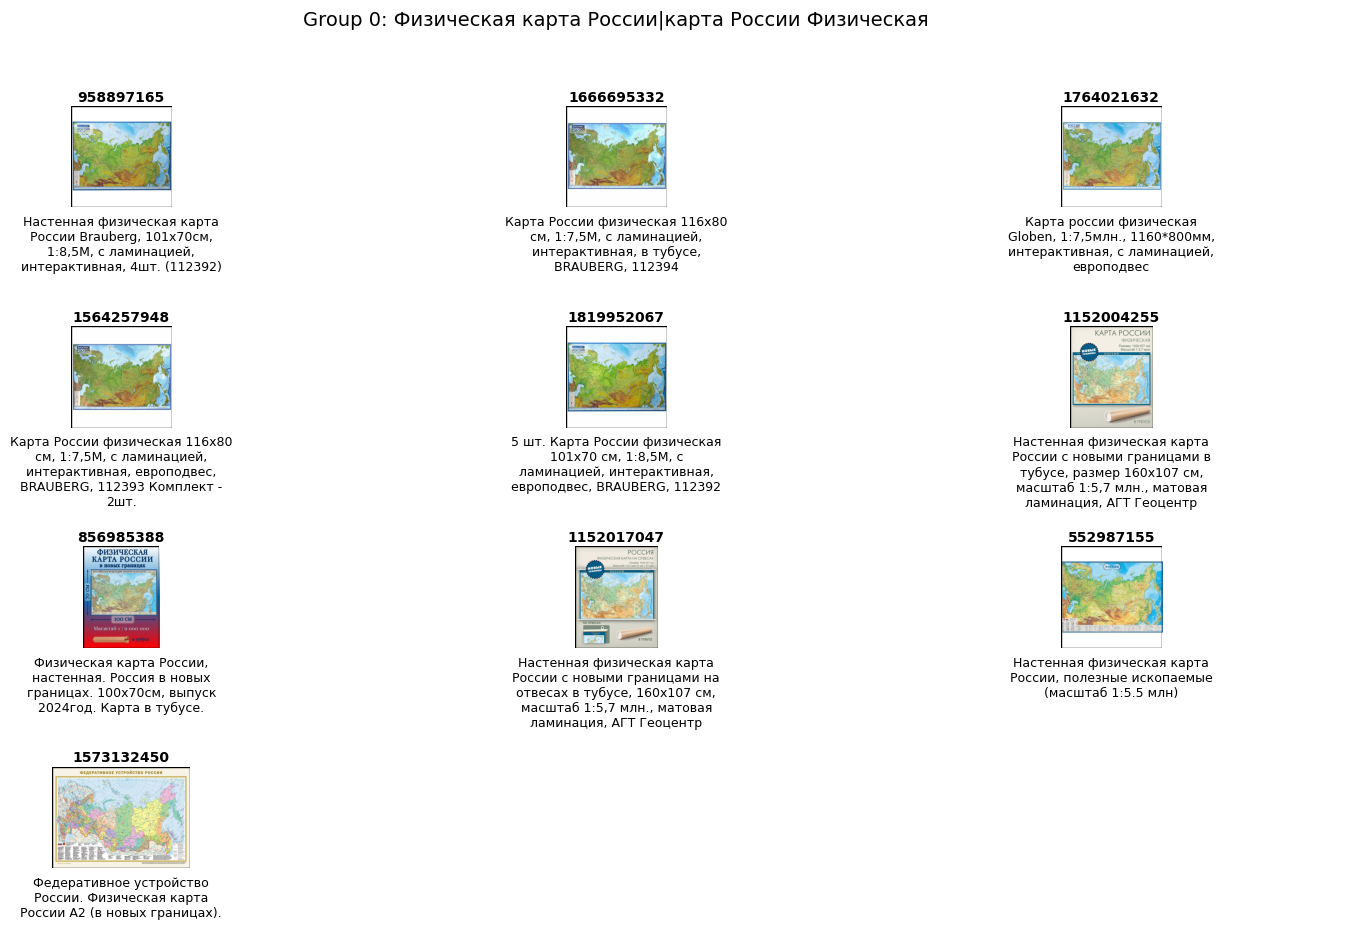

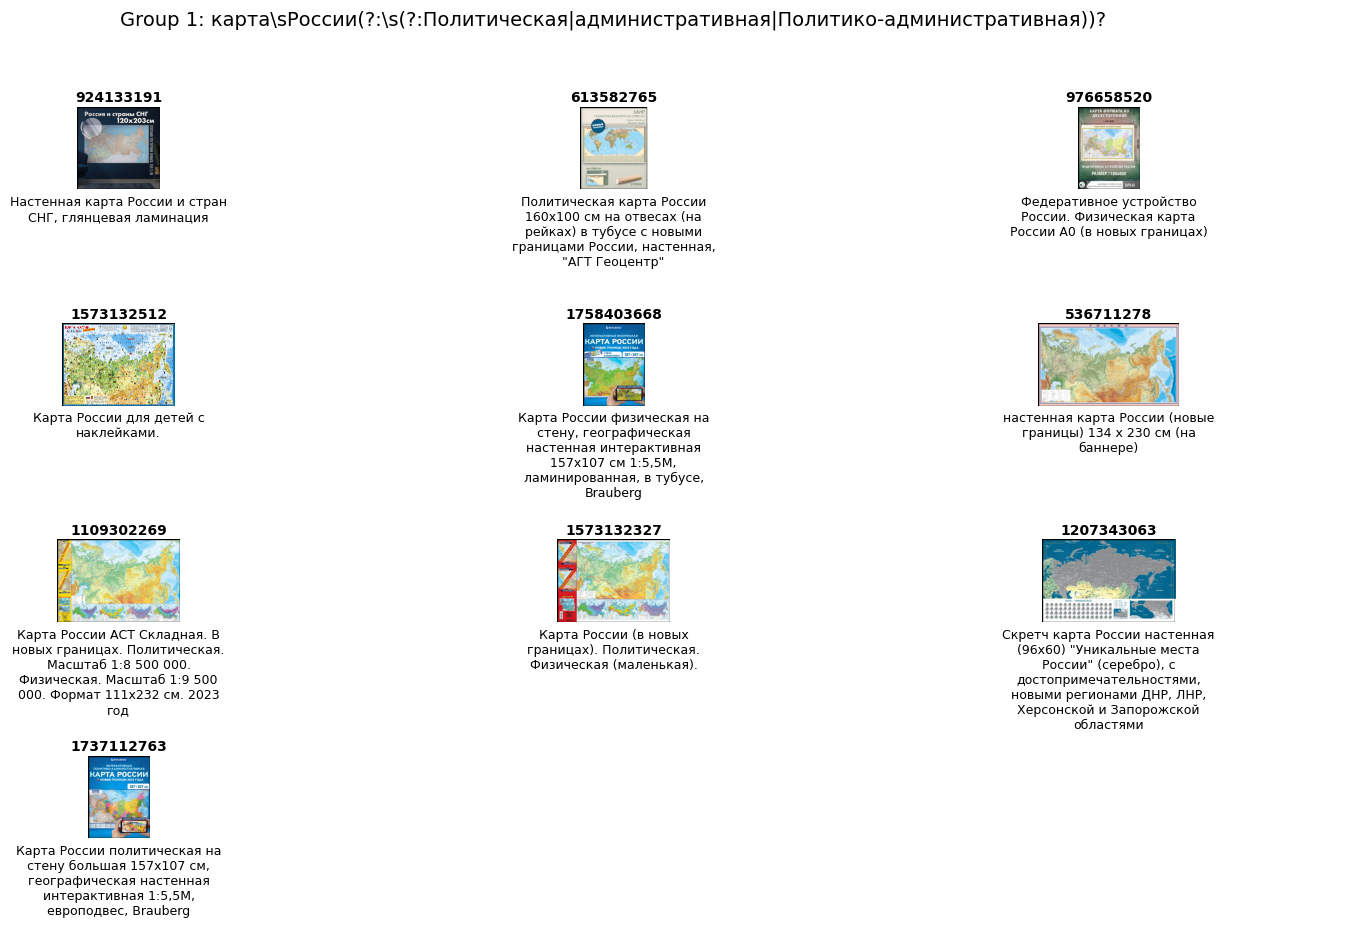

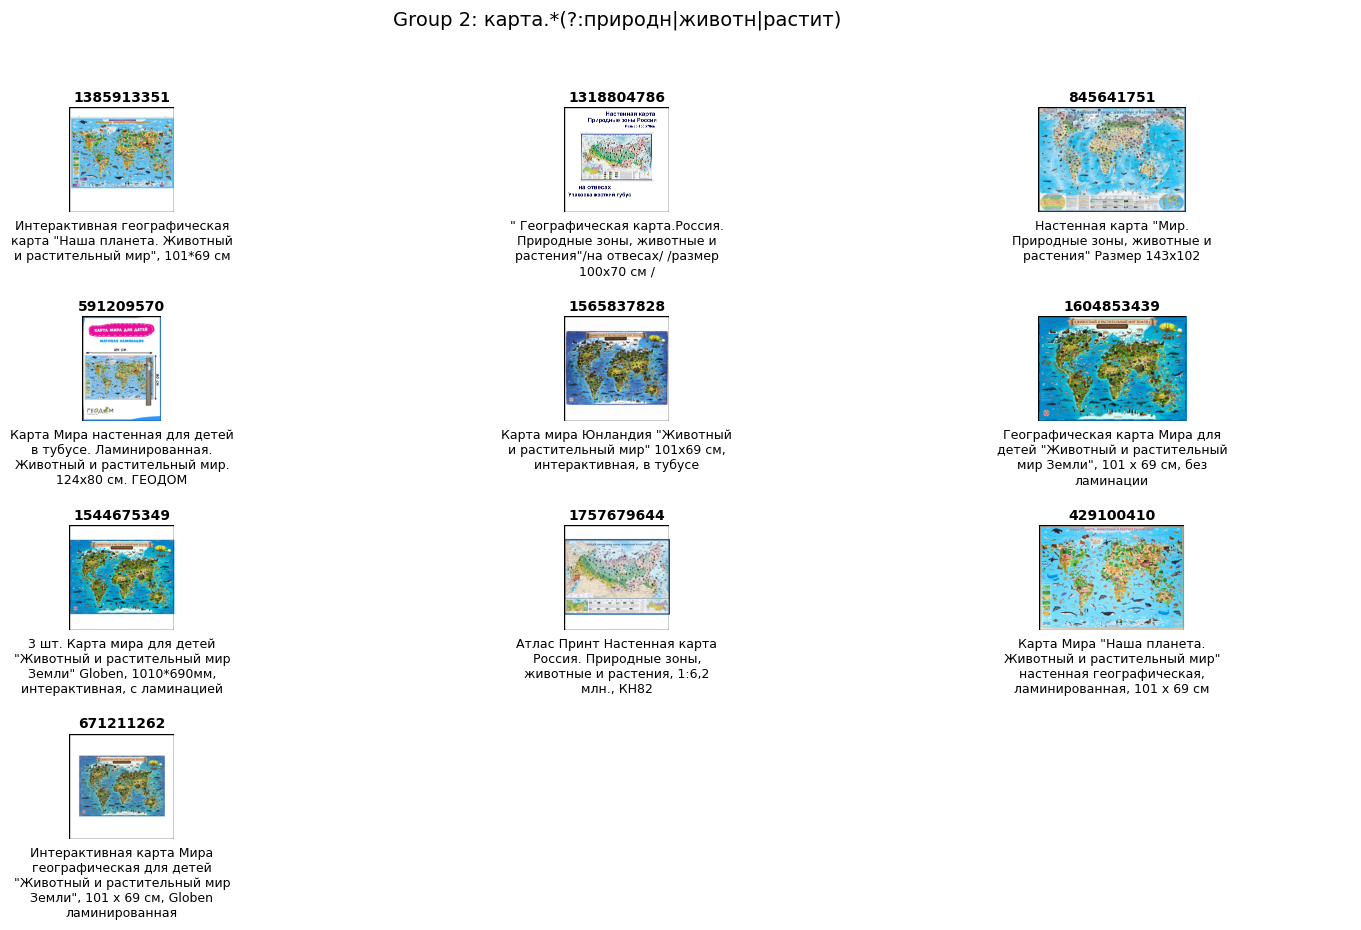

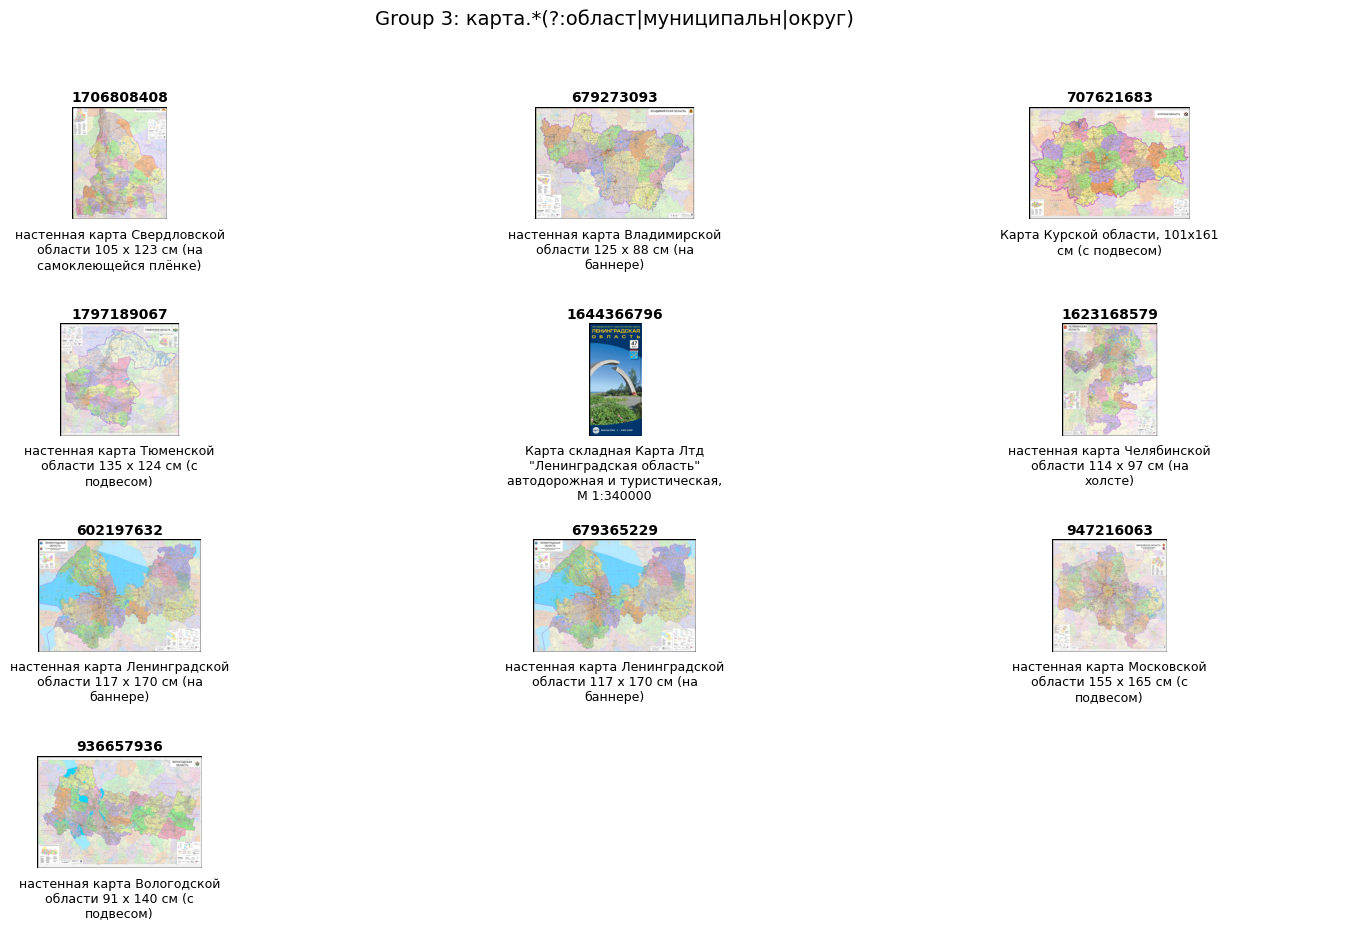

In [3564]:
from pathlib import Path
# IMAGES_DIR = Path('../competitors-xgb/data/images_OZ_geo_5500')

plot_samples_grid_by_group(
    sample_df,
    images_dir=IMAGES_DIR,
    image_col='image_name',   # or whatever your column is
    name_col='name',          # column containing the product name
    ncols=3,
    figsize=(15, 10)
)


## Prompts

In [3565]:
prompts = {}

def add_prompt(name, prompt, kwargs={}):
    prompts[name] = {}
    prompts[name]['name'] = name
    prompts[name]['kwargs'] = kwargs
    prompts[name]['template'] = prompt

In [3566]:
# Default prompt

prompt = """
For each input sku identify it's duplicates and most similar skus from the other sellers.
Consider skus to be similar if they have different sku and different seller and have similar attributes like width, height, type and packaging.
Consider similar skus to be duplicates only if they have exact same attributes but different skus and different sellers.

Treat each sku as a query and find its duplicates and similar skus among skus from other sellers.
For each query sku having more than one similar sku output a list of skus in .csv format like this:
sku_query,"sku_duplicate_1;sku_duplicate_2;...;sku_duplicate_N","sku_similar_1;sku_similar_2;...;sku_similar_N"
If duplicates are not found, output only similar skus:
sku_query,"","sku_similar_1;sku_similar_2;...;sku_similar_N",
If none similar skus are found do NOT output a row like this:
sku_query,"",""

Make sure every sku in the input list either has similar skus and duplicates listed or skipped because it doesnt have any similar skus.
Output no more than 3 duplicates and no more than 5 similar skus per query sku.

Output a single table with these exact columns:
0. sku_query
1. sku_duplicate
2. sku_similar

Input:
{input_descriptions}
"""

add_prompt('default', prompt)

In [3567]:
# Prompt 1

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists

prompt = """
For each input SKU identify its duplicates and most similar SKUs from other sellers.
Always enclose both the sku_duplicate and sku_similar lists in double quotes.
Consider SKUs similar if they have different SKU codes, different sellers, and share attributes (width, height, type, packaging).
Consider similar SKUs to be duplicates only when all attributes match exactly but SKU codes and sellers differ.

Treat each SKU as a query and find its duplicates and similar SKUs among other sellers.
For each query SKU with ≥1 similar SKU, output one CSV line:
sku_query,"sku_dup1;sku_dup2;…","sku_sim1;sku_sim2;…"
If no duplicates, leave sku_duplicate as "":
sku_query,"","sku_sim1;sku_sim2;…"
Skip any SKU with no similar SKUs.

Limit to ≤3 duplicates and ≤5 similars per query.
Output a single table with exact columns:
0. sku_query
1. sku_duplicate
2. sku_similar

Input:
{input_descriptions}
"""

add_prompt('1_0_use_double_quotes', prompt)

In [3568]:
# Prompt 2

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)

prompt = """
Task ‑ Find duplicates and similar SKUs among different sellers
──────────────────────────────────────────────────────────────────
Definitions
• Similar SKU – different sku_code AND different seller, yet attributes
  (width, height, type, packaging) are broadly similar.
• Duplicate SKU – different sku_code AND different seller AND all
  attributes match exactly.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate,sku_similar

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3","sim1;sim2;sim3;sim4;sim5"

• Use empty quotes if no duplicates:  sku_query,"","sim1;…"
• Never output a line where both list columns are "".

Input placeholder
────────────────
{input_descriptions}
"""

add_prompt('2_0_ignore_symmetrical_entries', prompt)

In [3569]:
# Prompt 3

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. domain knowledge injection

dk_injection = """
Категория товара: Карты географические

1. Общий тип:
- настенная
- складная
2. Упаковка:
- Нет особой упаковки
- Тубус
3. Крепление: 
- Нет особого крепления
- На рейках (отвесах)
4. Назначение:
- для дома/офиса/школы (для детей-школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
- Мир
- Конкретная страна (Россия)
- Конкретная область или город (Москва и область, Санкт-Петербург, Мурманская область)
"""

prompt = """
Task ‑ Find duplicates and similar SKUs among different sellers
──────────────────────────────────────────────────────────────────
Definitions
• Similar SKU – different sku_code AND different seller, yet attributes
  (width, height, type, packaging) are broadly similar.
• Duplicate SKU – different sku_code AND different seller AND all
  attributes match exactly.
• SKU attributes can be of two types:
  1. Blocking attributes. If a product for a given SKU doesnt have same attribute, it cannot be similar.
  2. Non-blocking attributes. If a product for a given SKU doesnt have same attribute, it can still be similar.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:
5. Make sure to determine duplicates according to the following blocking attributes:
6. If two products have different blocking attributes, they cannot be duplicates.
{dk_injection}

sku_query,sku_duplicate,sku_similar

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3","sim1;sim2;sim3;sim4;sim5"

• Use empty quotes if no duplicates:  sku_query,"","sim1;…"
• Never output a line where both list columns are "".

Input placeholder
────────────────
{input_descriptions}
"""

add_prompt(
  '3_0_domain_knowledge_injection', prompt,
           {'dk_injection': dk_injection}
          )

In [3570]:
# Prompt 3.1

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. domain knowledge injection (explicit)

prompt = """
Категория: географические карты  
────────────────────────────────

Блокирующие атрибуты  
(обязательно сравнивать; различие ⇒ НЕ дубликат и НЕ похожий)  
1. Общий тип: настенная | складная  
2. Упаковка: нет упаковки | тубус  
3. Крепление: нет крепления | на рейках  
4. Назначение: дом/офис/школа | туристы/водители | маленькие дети  
5. Область покрытия: мир | страна | регион/город  
6. Размеры: ширина × высота (в см)

Неблокирующие атрибуты — цвет, масштаб, язык подписи и т.п.  
────────────────────────────────
Задача — найти дубликаты и схожие SKU разных продавцов
────────────────────────────────

Определения  
• **Дубликат** — другой sku_code и другой seller, **все** блокирующие атрибуты совпадают 1‑к‑1 и **все** неблокирующие атрибуты совпадают. 
• **Похожий** — другой sku_code и другой seller, **все** блокирующие атрибуты совпадают 1‑к‑1, некоторые неблокирующие совпадают. 

Алгоритм  
1. Обработай входные SKU в алфавитном порядке.  
2. Веди множество *seen* (SKU, появившиеся в любой колонке).  
3. Для текущего SKU Q:  
   • Если Q ∈ *seen* → пропусти.  
   • Иначе найди ≤ 3 дубликата и ≤ 5 похожих SKU других продавцов.  
   • Пропусти Q, если похожих нет.  
   • Добавь Q и найденные SKU в *seen*.  
4. Сравни **каждый** из 6 блокирующих атрибутов перед тем, как пометить SKU как дубликат. Игнорировать их запрещено.

Формат вывода  
Заголовок:  
sku_query,sku_duplicate,sku_similar
Строка:  
sku_query,"dup1;dup2;...dup_n","sim1;sim2;…;sim_n"

• Если дубликатов нет → `"",`  
• Не выводи строку `"","",""`.

Входные данные  
────────────────  
{input_descriptions}

"""

add_prompt('3_1_explicit_domain_knowledge', prompt)

In [3571]:
# Prompt 3.2

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. domain knowledge injection (explicit, strict)

prompt = """
Категория: географические карты  
────────────────────────────────

‼️ БЛОКИРУЮЩИЕ АТРИБУТЫ – ОБЯЗАТЕЛЬНО ДОЛЖНЫ СОВПАДАТЬ ДЛЯ ЛЮБОЙ СВЯЗИ  
1. Общий тип: настенная | складная  
2. Упаковка: нет упаковки | тубус  
3. Крепление: нет крепления | на рейках  
4. Назначение: дом/офис/школа | туристы/водители | маленькие дети  
5. Область покрытия: мир | страна | регион/город  
6. Размеры: ширина × высота (в см)

❌ Если **хотя бы ОДИН** блокирующий атрибут различается → товары **НЕ** считаются ни дубликатами, ни похожими!  
(цвет, масштаб, язык и пр. — необязательные, сравнивать не нужно)

────────────────────────────────
Задача — найти дубликаты и схожие SKU разных продавцов
────────────────────────────────

Определения  
• **Дубликат** — другой sku_code и seller, **ВСЕ** блокирующие атрибуты совпадают 1‑к‑1.  
• **Похожий** — другой sku_code и seller, **ВСЕ** блокирующие атрибуты совпадают, но есть небольшие расхождения в необязательных характеристиках (цвет, масштаб и т. д.).  
• Любое расхождение в блокирующем атрибуте ⇒ «неродственный» товар (не выводится).

Алгоритм  
1. Обработай входные SKU по возрастанию.  
2. Веди множество *seen* (SKU, уже попавшие в любую колонку).  
3. Для SKU Q:  
   • Если Q ∈ *seen* → пропусти.  
   • Иначе найди ≤ 3 дубликата и ≤ 5 похожих среди других продавцов.  
   • Игнорируй товары, у которых не совпадает **хотя бы один** блокирующий атрибут.  
   • Если похожих нет → пропусти Q.  
   • Добавь Q и найденные SKU в *seen*.  
4. Перед записью **обязательно ещё раз** проверь совпадение всех 6 блокирующих атрибутов.

Формат вывода  
Заголовок:  
sku_query,sku_duplicate,sku_similar
Строка:  
sku_query,"dup1;dup2;...dup_n","sim1;sim2;…;sim_n"

• Если дубликатов нет → `"",`  
• Не выводи строку `"","",""`.

Входные данные  
────────────────  
{input_descriptions}
"""

add_prompt('3_2_strict_domain_knowledge', prompt)

In [3572]:
# Prompt 4 (duplicate products)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge

prompt = """
Task ‑ Find duplicate products among different sellers
──────────────────────────────────────────────────────────────────
Definitions
- A pair of products is considered a DUPLICATE then and only then when:
  1. They have different sku_code
  2. AND They have different seller
  3. AND all key attributes of the products match EXACTLY

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3"

• Never output a line where a query has no duplicates: sku_query,""

Input placeholder
────────────────
{input_descriptions}
"""

add_prompt('4_0_duplicate_products', prompt)

In [3573]:
# Prompt 5 (duplicate products with domain knowledge)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- общего назначения или для офиса/школы (для детей-школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры:
Товары являются дубликатами, только если они имеют одинаковые размеры:
- ширина × высота (в см)
"""

prompt = """
Task ‑ Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
- A pair of products is considered a DUPLICATE then and only then when:
  1. They have different sku_code
  2. AND They have different seller
  3. AND all key attributes of the products match EXACTLY
- Products are considered duplicates ONLY if all blocking attributes match exactly.
- If at least one blocking attribute differs, the products are considered NOT duplicates.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3"

• Never output a line where a query has no duplicates: sku_query,""

Blocking attributes:
────────────────
{blocking_attributes}

Product descriptions:
────────────────
{input_descriptions}
"""

add_prompt(
  '5_0_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3574]:
# Prompt 5.1 (duplicate products with domain knowledge)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- общего назначения или для офиса/школы (для детей-школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (**численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры:
- ширина × высота (в см)
"""

prompt = """
Task ‑ Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
- A pair of products is considered a DUPLICATE then and only then when:
  1. They have different sku_code
  2. AND They have different seller
  3. AND all key attributes of the products match EXACTLY
- Products are considered duplicates ONLY if all blocking attributes match exactly.
- If at least one blocking attribute differs, the products are considered NOT duplicates.
- Blocking attributes can be either categorical or numerical.
- When comparing numerical blocking attributes, compare their values as floats.
- If two products differ in **numerical** blocking attributes, they are NOT duplicates.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.
2. Keep a running “seen” set of every sku_code that has already been
   emitted (as sku_query, sku_duplicate or sku_similar).
3. For the current SKU Q:
   • If Q is in the seen set, SKIP it (its group is already printed).
   • Otherwise, collect up to 3 duplicates and up to 5 similar SKUs
     from other sellers.
   • If Q has zero similar SKUs, SKIP it.
4. Emit one CSV row with this exact header and column order:

sku_query,sku_duplicate

Row syntax (lists ALWAYS in double quotes):
sku_query,"dup1;dup2;dup3"

• Never output a line where a query has no duplicates: sku_query,""

Blocking attributes:
────────────────
{blocking_attributes}

Product descriptions:
────────────────
{input_descriptions}
"""

add_prompt(
  '5_1_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3575]:
# Prompt 5.2 (duplicate products with domain knowledge, numerical blocking attributes v2)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- общего назначения или для офиса/школы (для детей‑школьников)
- для туристов/водителей
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.
"""

prompt = """
Task – Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** blocking attributes match **EXACTLY**.
• If at least one blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate

Format (list ALWAYS in double quotes):  
sku_query,"dup1;dup2;dup3"

• Never output: sku_query,""  (row without duplicates)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  '5_2_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3576]:
# Prompt 5.3 (duplicate products with domain knowledge)

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- нет крепления
- на рейках
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- для офиса, школы, дома
- автомобильная
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.
"""

prompt = """
Task – Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** blocking attributes match **EXACTLY**.
• If at least one blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate

Format (list ALWAYS in double quotes):  
sku_query,"dup1;dup2;dup3"

• Never output: sku_query,""  (row without duplicates)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  '5_3_duplicate_products_with_domain_knowledge',
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3577]:
# Prompt 5.4 (duplicate products with domain knowledge)

prompt_name = '5_4_duplicate_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- с помощью скотча или кнопок
- с отвесами (рейками) на петлях
4. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- для офиса, школы, дома
- автомобильная
- для маленьких детей
5. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
6. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.
"""

prompt = """
Task – Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** blocking attributes match **EXACTLY**.
• If at least one blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate

Format (list ALWAYS in double quotes):  
sku_query,"dup1;dup2;dup3"

• Never output: sku_query,""  (row without duplicates)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3578]:
# Prompt 5.5 (duplicate products with domain knowledge)

prompt_name = '5_5_duplicate_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. edited blocking attributes (область покрытия, тип отображения)

domain = "Карты географические"

blocking_attributes = """
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Тип отображения:
Товары являются дубликатами, только если они имеют одинаковый тип отображения:
- политическая
- административная (политико-административная)
- физическая
- природная
3. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
4. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- с помощью скотча или кнопок
- с отвесами (рейками) на петлях
5. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- для офиса, школы, дома
- автомобильная
- для маленьких детей
6. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир (не полушария)
- мир (полушария)
- страна
- регион/город
7. Размеры (🔢 **численный атрибут**):
 Товары являются дубликатами, только если они имеют одинаковые размеры.
 Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.
8. Масштаб (🔢 **численный атрибут**):
  Товары являются дубликатами, только если они имеют одинаковый масштаб.
  Переведи масштаб из отношения (напр. 1:1000000) в дробь (0.000001) и сравни как ЧИСЛА (float); любая разница → не дубликаты.
"""

prompt = """
Task – Find duplicate products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** blocking attributes match **EXACTLY**.
• If at least one blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate

Format (list ALWAYS in double quotes):  
sku_query,"dup1;dup2;dup3"

• Never output: sku_query,""  (row without duplicates)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3579]:
# Prompt 6 (detect both duplicates AND similar)

prompt_name = '6_0_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES:
1. Общий тип:
Товары являются дубликатами, только если они имеют одинаковый общий тип:
- настенная
- складная
2. Область покрытия:
Товары являются дубликатами, только если они имеют одинаковую область покрытия:
- мир
- страна
- регион/город
2. Упаковка:
Товары являются дубликатами, только если они имеют одинаковую упаковку:
- нет упаковки
- тубус
3. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют одинаковые размеры.
Сравни ширину и высоту как ЧИСЛА (float, см); любая разница → не дубликаты.

NON-CRITICAL BLOCKING ATTRIBUTES:
1. Назначение:
Товары являются дубликатами, только если они имеют одинаковое назначение:
- для офиса, школы, дома
- автомобильная
- для маленьких детей
2. Крепление:
Товары являются дубликатами, только если они имеют одинаковое крепление:
- с помощью скотча или кнопок
- с отвесами (рейками) на петлях
3. Размеры (🔢 **численный атрибут**):
Товары являются дубликатами, только если они имеют ПРИМЕРНО одинаковые размеры (разница не более 10% по каждому измерению).
Сравни ширину и высоту как ЧИСЛА (float, см); если разница по одному из измерений больше 10% → не дубликаты и не похожие.
если разница по всем измерениям меньше 10% → похожий (возможно дубликат).
"""

prompt = """
Task – Find duplicate and similar products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
Definitions
• A pair of products is a **DUPLICATE** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** CRITICAL and **ALL** NON-CRITICAL blocking attributes match **EXACTLY**.
• If at least one CRITICAL blocking attribute (categorical **или** численный) differs → NOT duplicates.  
• A pair of products is a **SIMILAR** only when  
  1. sku_code differs  
  2. seller differs  
  3. **ALL** CRITICAL and **AT LEAST ONE** NON-CRITICAL blocking attributes match **APPROXIMATELY**.
• If all CRITICAL blocking attributes match but all NON-CRITICAL blocking attributes (categorical **или** численный) differ → NOT similar.
• Когда сравниваешь ЧИСЛЕННЫЕ блокирующие атрибуты (ширина, высота),  
  ПРЕОБРАЗУЙ значения в float и сравнивай их **как числа**; любое расхождение = не дубликаты.

Processing rules
1. Sort input SKUs in ascending alphanumeric order.  
2. Maintain a *seen* set of every sku_code already emitted.  
3. For current SKU Q:  
   • If Q ∈ *seen* → skip.  
   • Else collect ≤ 3 duplicates from other sellers.  
   • Skip Q if duplicates list is empty.  
4. Emit one CSV row with header and **exact** columns:

sku_query,sku_duplicate,sku_similar
Строка:  
sku_query,"dup1;dup2;...dup_n","sim1;sim2;…;sim_n"

• Если похожих нет → `""`  
• Never output: sku_query,"",""  (row without duplicates and similar)

Blocking attributes
────────────────
{blocking_attributes}

Product descriptions
────────────────
{input_descriptions}
"""


add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)


In [3580]:
# Prompt 6.1 (detect both duplicates AND similar, edited by GPT)

prompt_name = '6_1_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection
# 9. edit prompt with GPT

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES  
(ВСЕ должны совпадать для DUPLICATE или SIMILAR)

1. Общий тип: настенная | складная  
2. Область покрытия: мир | страна | регион/город  
3. Упаковка: без упаковки | тубус  
4. Размеры 🔢 (численный): ширина × высота, см  
   • Считаются равными **только при точном совпадении**.  
   • Любая разница → не дубликаты и не похожие.

NON‑CRITICAL BLOCKING ATTRIBUTES  
(используются для различия DUPLICATE ↔ SIMILAR)

1. Назначение: офис/школа/дом | автомобильная | для детей  
2. Крепление: скотч/кнопки | рейки (отвесы)  
3. Размеры 🔢 (численный): ширина × высота, см  
   • Допускается отклонение ≤ 10 % по КАЖДОМУ измерению.  
   • > 10 % по хотя бы одному измерению → не дубликаты и не похожие.
"""

prompt = """
Task – Find **duplicate** and **similar** products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
🔹 **DUPLICATE**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • ВСЕ **NON‑CRITICAL** атрибуты совпадают **точно**  
  • Для численных CRITICAL – сравни float; любое расхождение → не дубликаты.  
  • Для численных NON‑CRITICAL – расхождение ≤ 10 % допустимо ТОЛЬКО для SIMILAR (см. ниже).

🔹 **SIMILAR**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • Минимум ОДИН NON‑CRITICAL атрибут совпадает (остальные могут отличаться)  
  • Для численных NON‑CRITICAL – каждая ширина и высота может отличаться на ≤ 10 %.  
  • Если хотя бы один NON‑CRITICAL численный атрибут отличается > 10 % → НЕ похожие.

Если CRITICAL атрибуты НЕ совпадают → товары игнорируются (ни DUPLICATE, ни SIMILAR).

Processing rules  
1. Отсортируй входные SKU по возрастанию.  
2. Веди *seen* – все sku_code, уже появившиеся.  
3. Для SKU Q:  
   • Если Q ∈ *seen* – пропусти.  
   • Иначе собери ≤ 3 DUPLICATE и ≤ 5 SIMILAR из других продавцов.  
   • Пропусти Q, если список DUPLICATE пуст.  
4. Выведи CSV со строго таким заголовком:

sku_query,sku_duplicate,sku_similar

Строка:  
sku_query,"dup1;dup2;...dup_n","sim1;sim2;…;sim_n"

• Если SIMILAR нет → `""`  
• Не выводи: sku_query,"",""  (строка без дубликатов и похожих)

Blocking attributes  
────────────────  
{blocking_attributes}

Product descriptions  
────────────────  
{input_descriptions}
"""

add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3581]:
# Prompt 6.2 (detect both duplicates AND similar, edited by GPT)

prompt_name = '6_2_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection
# 9. edit prompt with GPT
# 10.1 edited blocking attributes (назначение)
# 10.2 edit formatting/output rules

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES  
(ВСЕ должны совпадать для DUPLICATE или SIMILAR)

1. Общий тип: настенная | складная  
2. Область покрытия: мир | полушария | страна | регион | город  
3. Упаковка: без упаковки | тубус  
4. Размеры 🔢 (численный): ширина × высота, см  
   • Считаются равными **только при точном совпадении**.  
   • Любая разница → не дубликаты и не похожие.

NON‑CRITICAL BLOCKING ATTRIBUTES  
(используются для различия DUPLICATE ↔ SIMILAR)

1. Назначение: офис/школа/дом | автомобильная | для детей  
2. Крепление: скотч/кнопки | рейки (отвесы)  
3. Размеры 🔢 (численный): ширина × высота, см  
   • Допускается отклонение ≤ 10 % по КАЖДОМУ измерению.  
   • > 10 % по хотя бы одному измерению → не дубликаты и не похожие.
"""

prompt = """
Task – Find **duplicate** and **similar** products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
🔹 **DUPLICATE**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • ВСЕ **NON‑CRITICAL** атрибуты совпадают **точно**  
  • Для численных CRITICAL – сравни float; любое расхождение → не дубликаты.  
  • Для численных NON‑CRITICAL – расхождение ≤ 10 % допустимо ТОЛЬКО для SIMILAR (см. ниже).

🔹 **SIMILAR**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • Минимум ОДИН NON‑CRITICAL атрибут совпадает (остальные могут отличаться)  
  • Для численных NON‑CRITICAL – каждая ширина и высота может отличаться на ≤ 10 %.  
  • Если хотя бы один NON‑CRITICAL численный атрибут отличается > 10 % → НЕ похожие.

Если CRITICAL атрибуты НЕ совпадают → товары игнорируются (ни DUPLICATE, ни SIMILAR).

Processing rules  
1. Отсортируй входные SKU по возрастанию.  
2. Веди *seen* – все sku_code, уже появившиеся.  
3. Для SKU Q:  
   • Если Q ∈ *seen* – пропусти.  
   • Иначе собери ≤ 3 DUPLICATE и ≤ 5 SIMILAR из других продавцов.  
   • Пропусти Q, если список DUPLICATE пуст.  
4.1 Выведи CSV со строго таким заголовком:
sku_query,sku_duplicate,sku_similar
4.2 Выводи строки CSV в формате:
sku_query,"dup1;dup2;...dup_n","sim1;sim2;…;sim_n"

Formatting rules
• **DUPLICATE** не может быть **SIMILAR** к другому товару; выводи sku только в поле sku_duplicate, не повторяй их в sku_similar.
• Не повторяй одинаковые **DUPLICATE** в поле sku_duplicate.
• Не повторяй одинаковые **SIMILAR** в поле sku_similar.
• SKU Q не может быть **DUPLICATE** или **SIMILAR** к самому себе.
• Если SIMILAR нет → `""`  
• Не выводи: sku_query,"",""  (строка без дубликатов и похожих)

Blocking attributes  
────────────────  
{blocking_attributes}

Product descriptions  
────────────────  
{input_descriptions}
"""

add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3582]:
# Prompt 6.3 (detect both duplicates AND similar, edited by GPT)

prompt_name = '6_3_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection
# 9. edit prompt with GPT
# 10 edited blocking attributes (назначение)

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES  
(ВСЕ должны совпадать для DUPLICATE или SIMILAR)

1. Общий тип: настенная | складная  
2. Область покрытия: мир (не полушария) | мир (полушария) | страна | регион | город  
3. Упаковка: без упаковки | тубус  
4. Размеры 🔢 (численный): ширина × высота, см  
   • Считаются равными **только при точном совпадении**.  
   • Любая разница → не дубликаты и не похожие.

NON‑CRITICAL BLOCKING ATTRIBUTES  
(используются для различия DUPLICATE ↔ SIMILAR)

1. Назначение: офис/школа/дом | автомобильная | для детей  
2. Крепление: скотч/кнопки | рейки (отвесы)  
3. Размеры 🔢 (численный): ширина × высота, см  
   • Допускается отклонение ≤ 10 % по КАЖДОМУ измерению.  
   • > 10 % по хотя бы одному измерению → не дубликаты и не похожие.
"""

prompt = """
Task – Find **duplicate** and **similar** products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────
🔹 **DUPLICATE**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • ВСЕ **NON‑CRITICAL** атрибуты совпадают **точно**  
  • Для численных CRITICAL – сравни float; любое расхождение → не дубликаты.  
  • Для численных NON‑CRITICAL – расхождение ≤ 10 % допустимо ТОЛЬКО для SIMILAR (см. ниже).

🔹 **SIMILAR**  
  • sku_code разные, seller разные  
  • ВСЕ **CRITICAL** атрибуты совпадают **точно**  
  • Минимум ОДИН NON‑CRITICAL атрибут совпадает (остальные могут отличаться)  
  • Для численных NON‑CRITICAL – каждая ширина и высота может отличаться на ≤ 10 %.  
  • Если хотя бы один NON‑CRITICAL численный атрибут отличается > 10 % → НЕ похожие.

Если CRITICAL атрибуты НЕ совпадают → товары игнорируются (ни DUPLICATE, ни SIMILAR).

Processing rules  
1. Отсортируй входные SKU по возрастанию.  
2. Веди *seen* – все sku_code, уже появившиеся.  
3. Для SKU Q:  
   • Если Q ∈ *seen* – пропусти.  
   • Иначе собери ≤ 3 DUPLICATE и ≤ 5 SIMILAR из других продавцов.  
   • Пропусти Q, если список DUPLICATE пуст.  
4. Выведи CSV со строго таким заголовком:

sku_query,sku_duplicate,sku_similar

Строка:  
sku_query,"dup1;dup2;...dup_n","sim1;sim2;…;sim_n"

• Если SIMILAR нет → `""`  
• Не выводи: sku_query,"",""  (строка без дубликатов и похожих)

Blocking attributes  
────────────────  
{blocking_attributes}

Product descriptions  
────────────────  
{input_descriptions}
"""

add_prompt(
  prompt_name,
  prompt,
  kwargs={
    'domain': domain,
    'blocking_attributes': blocking_attributes,
  } 
)

In [3583]:
# Prompt 6.4 (detect both duplicates AND similar, edited by GPT)

prompt_name = '6_4_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection
# 9. edit prompt with GPT
# 10 edited blocking attributes (назначение)
# 11. make blocking attributes description more explicit

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES  
(каждый пункт ДОЛЖЕН совпадать для DUPLICATE и SIMILAR)

1. **Общий тип**  
   Товары являются дубликатами только если они имеют одинаковый тип:  
   настенная **ИЛИ** складная  

2. **Область покрытия**  
   Товары являются дубликатами только если они имеют одинаковую область покрытия:  
   мир (не полушария) **ИЛИ** мир (полушария) **ИЛИ** страна **ИЛИ** регион **ИЛИ** город  

3. **Упаковка**  
   Товары являются дубликатами только если они имеют одинаковую упаковку:  
   без упаковки **ИЛИ** тубус  

4. **Размеры 🔢 (численный)**  
   Товары являются дубликатами только если ширина и высота совпадают *точно* (float, см).  
   Любая разница → товары не дубликаты и не похожие.

NON‑CRITICAL BLOCKING ATTRIBUTES  
(используются, чтобы отличить DUPLICATE от SIMILAR)

1. **Назначение**  
   Товары являются дубликатами (и возможными похожими) только если они имеют одинаковое назначение:  
   офис/школа/дом **ИЛИ** автомобильная **ИЛИ** для детей  

2. **Крепление**  
   Товары являются дубликатами (и возможными похожими) только если они имеют одинаковое крепление:  
   скотч/кнопки **ИЛИ** рейки (отвесы)  

3. **Размеры 🔢 (численный)**  
   Для NON‑CRITICAL размеров допускается отклонение ≤ 10 % по *каждой* стороне.  
   • Отклонение ≤ 10 % → товары могут быть SIMILAR.  
   • Отклонение > 10 % хотя бы по одной стороне → не дубликаты и не похожие.
"""

prompt = """
Task – Find **duplicate** and **similar** products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────

DEFINITIONS  
• **DUPLICATE** – sku_code разные, seller разные, и ВСЕ CRITICAL + ВСЕ NON‑CRITICAL атрибуты совпадают *точно*.  
• **SIMILAR** – sku_code разные, seller разные, и ВСЕ CRITICAL совпадают *точно*,  
  а среди NON‑CRITICAL совпадает **минимум один** (см. правила размеров выше).  
• Несовпадение любого CRITICAL атрибута → товары игнорируются.  
• Численные атрибуты сравнивай как float.

PROCESSING RULES  
1. Сортируй входные SKU по возрастанию.  
2. Веди *seen* – все sku_code, уже встреченные.  
3. Для SKU Q:  
   • Если Q ∈ *seen* – пропусти.  
   • Иначе найди ≤ 3 DUPLICATE и ≤ 5 SIMILAR.  
   • Пропусти Q, если DUPLICATE‑список пуст.  
4. CSV‑вывод:

sku_query,sku_duplicate,sku_similar  
sku_query,"dup1;dup2;dup3","sim1;sim2;…"  

• Нет SIMILAR → `""` (пустые кавычки).  
• Не выводи строку вида sku_query,"","".

BLOCKING ATTRIBUTES  
────────────────  
{blocking_attributes}

PRODUCT DESCRIPTIONS  
────────────────  
{input_descriptions}
"""

add_prompt(
    prompt_name,
    prompt,
    kwargs={
        'domain': domain,
        'blocking_attributes': blocking_attributes,
    }
)


In [3584]:
50 * 0.24

12.0

In [3585]:
# Prompt 6.5 (detect both duplicates AND similar, edited by GPT)

prompt_name = '6_5_duplicate_and_similar_products_with_domain_knowledge'

# 1. limit the number of duplicates and similar skus
# 2. always use double quotes for the lists
# 3. ignore symmetrical entries (A,B and B,A are the same)
# 4. hard-coded domain knowledge
# 5. numerical blocking attributes are compared as floats (enhanced)
# 6. edited blocking attributes (назначение)
# 7. edited blocking attributes (крепление)
# 8. add similar products detection
# 9. edit prompt with GPT
# 10 edited blocking attributes (назначение)
# 11. make blocking attributes description more explicit

domain = "Карты географические"

blocking_attributes = """
CRITICAL BLOCKING ATTRIBUTES  
(каждый пункт ДОЛЖЕН совпадать для DUPLICATE и SIMILAR)

1. **Общий тип**  
   Товары являются дубликатами только если они имеют одинаковый тип:  
   настенная **ИЛИ** складная  

2. **Область покрытия**  
   Товары являются дубликатами только если они имеют одинаковую область покрытия:  
   мир (не полушария) **ИЛИ** мир (полушария) **ИЛИ** страна **ИЛИ** регион **ИЛИ** город  

3. **Упаковка**  
   Товары являются дубликатами только если они имеют одинаковую упаковку:  
   без упаковки **ИЛИ** тубус  

4. **Размеры 🔢 (численный)**  
   Товары являются дубликатами только если ширина и высота совпадают *точно* (float, см).  
   Любая разница → товары не дубликаты и не похожие.

5. **Крепление**  
   Товары являются дубликатами только если они имеют одинаковое крепление: 
   скотч/кнопки **ИЛИ** рейки (отвесы)  

NON‑CRITICAL BLOCKING ATTRIBUTES  
(используются, чтобы отличить DUPLICATE от SIMILAR)

1. **Назначение**  
   Товары являются дубликатами (и возможными похожими) только если они имеют одинаковое назначение:  
   офис/школа/дом **ИЛИ** автомобильная **ИЛИ** для детей  


2. **Размеры 🔢 (численный)**  
   Для NON‑CRITICAL размеров допускается отклонение ≤ 10 % по *каждой* стороне.  
   • Отклонение ≤ 10 % → товары могут быть SIMILAR.  
   • Отклонение > 10 % хотя бы по одной стороне → не дубликаты и не похожие.
"""

prompt = """
Task – Find **duplicate** and **similar** products among different sellers for category: {domain}
──────────────────────────────────────────────────────────────────

DEFINITIONS  
• **DUPLICATE** – sku_code разные, seller разные, и ВСЕ CRITICAL + ВСЕ NON‑CRITICAL атрибуты совпадают *точно*.  
• **SIMILAR** – sku_code разные, seller разные, и ВСЕ CRITICAL совпадают *точно*,  
  а среди NON‑CRITICAL совпадает **минимум один** (см. правила размеров выше).  
• Несовпадение любого CRITICAL атрибута → товары игнорируются.  
• Численные атрибуты сравнивай как float.

PROCESSING RULES  
1. Сортируй входные SKU по возрастанию.  
2. Веди *seen* – все sku_code, уже встреченные.  
3. Для SKU Q:  
   • Если Q ∈ *seen* – пропусти.  
   • Иначе найди ≤ 3 DUPLICATE и ≤ 5 SIMILAR.  
   • Пропусти Q, если DUPLICATE‑список пуст.  
4. CSV‑вывод:

sku_query,sku_duplicate,sku_similar  
sku_query,"dup1;dup2;dup3","sim1;sim2;…"  

• Нет SIMILAR → `""` (пустые кавычки).  
• Не выводи строку вида sku_query,"","".

BLOCKING ATTRIBUTES  
────────────────  
{blocking_attributes}

PRODUCT DESCRIPTIONS  
────────────────  
{input_descriptions}
"""

add_prompt(
    prompt_name,
    prompt,
    kwargs={
        'domain': domain,
        'blocking_attributes': blocking_attributes,
    }
)

In [3586]:
# Prompt 7

prompt_name = '7_duplicate_and_similar_products_concrete'

blocking_attributes = """
CRITICAL ATTRIBUTES  

1. Тип отображения (categorical)
   - физическая
   - политическая
   - административная (административно-политическая)
   - природные зоны (с животными и растениями)

2. Общий тип (categorical)
   - настенная
   - складная

3. Область покрытия (categorical)
   - мира
   - мира (полушария)
   - страны
   - региона
   - округа
   - города  
   - города и области (напр. Москва и Московская область)

4. Упаковка (categorical)
   - без упаковки
   - тубус

5. Крепление (categorical)
   - скотч/кнопки
   - на отвесах (рейках)
   - европодвес

6. Назначение (categorical)
   - офис/школа/дом
   - для детей

NON‑CRITICAL ATTRIBUTES  

1. Бренд (categorical)
 - 8&8
 - ANYSMART
 - ARIA
 - Arthata - Карта
 - Arthata - Карты
 - ArtulLife
 - BalticAir
 - Brauberg
 - CENTR MAG ЦЕНТРАЛЬНЫЙ ИНТЕРНЕТ-МАГАЗИН
 - DMB
 - Edustrong
 - GLOBUSOFF
 - GORAVODA
 - GSPrint
 - Gift Development
 - Globen
 - Jmar
 - Josef Otten
 - LISIK.
 - Luxury Gift
 - Mazari
 - Musson
 - My wood map
 - NONAME
 - No Name SHOP
 - Nobikum
 - SK-Poster
 - Solartek
 - Warhammer 40K
 - Wondershop
 - АГТ Геоцентр
 - АСТ
 - Административная карта
 - Арт-студия Ариша. Мастерская багета
 - АртБорд
 - Атлас Принт
 - Атлас-карта
 - Бумажная продукция
 - Бумбаса
 - Властелин колец
 - ГеоДом
 - Географическая карта
 - Гравировка02.рф
 - ДИЭМБИ
 - Дик
 - ИД ПОРТ-АПРЕЛЬ
 - ИКС
 - Играматика
 - Издательство КАРО
 - Издательство Экспресс
 - Институт навигационных технологий
 - Канцелярия
 - Карта ТД
 - Картография
 - Карты мира
 - Лира2puzzle
 - Маленький гений
 - Местные
 - Мини Тайп
 - Найти
 - Неважно
 - ОТРОК
 - Омская картографическая фабрика
 - Открытая планета
 - ПОЛИГОН
 - Пилот
 - ПолиЦентр
 - Правила Успеха
 - Просвещение
 - ПРОкарта
 - РУЗ Ко
 - Роскадастр
 - Роскартография
 - РостАГП
 - Сима-Ленд
 - Сити Бланк
 - Фабрика настенных карт
 - ЭкоАрт
 - Эксмо
 - Юнландия

2. Размер [в см/мм/м: Ширина x Высота] (numerical)
2.1 Ширина (numerical) MARGIN = 10% 
2.2 Высота (numerical) MARGIN = 10%
! ВАЖНО: всегда учитывай размер именно в таком порядке: ширина x высота; например, 100x70 см и 70x100 см – это различные размеры.

3. Размер [по коду] (categorical)
   - A0
   - A1
   - A2
   - OTHER

4. Масштаб (categorical)
   - 1:22000000 (1:22 млн)
   - 1:44000000 (1:44 млн)
   - OTHER

5. Границы (categorical)
   - с новыми границами
   - OTHER

6. Стиль (categorical)
   - ретро
   - историческая
   - автомобильная
   - OTHER

"""

prompt = """
# TASK
Your task is to find all duplicate and similar products among different sellers. Try to find as many duplicates and similars as possible.
Solve task in two steps:
1. Extract ATTRIBUTE VALUES from the PRODUCT DESCRIPTIONS according to the List OF ATTRIBUTES and possible ATTRIBUTE VALUES.
2. For each input QUERY product, rank other CANDIDATE products in the order of descending similarity using the extracted ATTRIBUTE VALUES.

# DEFINITIONS
ATTRIBUTE VALUES are categorical or numerical values extracted from the PRODUCT DESCRIPTIONS according to the LIST OF ATTRIBUTES.
A product is considered CANDIDATE for a given QUERY if it meets the following conditions:
(CONDITION 1) sku of the CANDIDATE product is different from the sku of the QUERY product.
(CONDITION 2) seller of the CANDIDATE product is different from the seller of the QUERY product.
A CANDIDATE can be only one of the following three ranks (highest to lowest): DUPLICATE, SIMILAR, or DISSIMILAR.
Each CANDIDATE product belongs to only one of the following three ranks (highest to lowest): DUPLICATE, SIMILAR, or DISSIMILAR.
A CANDIDATE product is considered DUPLICATE if and only if it meets CONDITION 3 and CONDITION 4:
(CONDITION 3) all CRITICAL ATTRIBUTE VALUES are exactly the same as for the QUERY product;
(CONDITION 4) all NON‑CRITICAL ATTRIBUTE VALUES (both numerical and categorical) are exactly the same as ones for the QUERY product.
A CANDIDATE product which is NOT DUPLICATE is considered SIMILAR if and only if it meets CONDITION 3 and CONDITION 5:
(CONDITION 3) all CRITICAL ATTRIBUTE VALUES are exactly the same as for the QUERY product;
(CONDITION 5) all numerical NON‑CRITICAL ATTRIBUTE VALUES differ from the QUERY product by no more than specified MARGIN for a given ATTRIBUTE;
A CANDIDATE product is considered DISSIMILAR if it is neither DUPLICATE nor SIMILAR.
When comparing numerical ATTRIBUTE VALUES, compare them as floats.

# OUTPUT FORMAT
Output a valid CSV file with a header.

Header (once):
sku_query,sku_duplicate,sku_similar

Row (only if dup or sim exists):
<query_id>,"dup1;dup2;…","sim1;sim2;…"

Formatting rules:
- Lists for sku_duplicate and sku_similar always in double quotes, items split by “;” (no spaces).
- Empty list → "".
- Skip queries with no dup and no sim.
- No extra text or blank lines; end file with a single newline.


# INPUT DATA
## List of ATTRIBUTES and possible ATTRIBUTE VALUES:
{blocking_attributes}

## List of PRODUCT DESCRIPTIONS:
{input_descriptions}
"""

add_prompt(
    prompt_name,
    prompt,
    kwargs={
        'domain': domain,
        'blocking_attributes': blocking_attributes,
    }
)

# Main

## Run chain

In [3587]:
# SET SYSTEM PROMPT

# chosen_system_template = """
# Your task is to assist in labeling positive pairs for cross-encoder fine-tuning on e-commerce domain.
# Pay extra attention to the attributes when comparing products.
# Answer in valid CSV format with a header.
# Do NOT use triple quotes (```) before or after outputting CSV.
# Do NOT write '```csv' before outputting CSV.
# """

chosen_system_template = """
You are helping to label a dataset of product pairs.
Answer in valid CSV format with a header.
Do NOT use triple quotes (```) before or after outputting CSV.
Do NOT write '```csv' before outputting CSV.
"""

explain_system_template = """
You are helping to label a dataset of product pairs.
"""

In [3588]:
print("Available user prompts:\n")
for p in list(prompts.keys()):
    print(f"'{p}'")


Available user prompts:

'default'
'1_0_use_double_quotes'
'2_0_ignore_symmetrical_entries'
'3_0_domain_knowledge_injection'
'3_1_explicit_domain_knowledge'
'3_2_strict_domain_knowledge'
'4_0_duplicate_products'
'5_0_duplicate_products_with_domain_knowledge'
'5_1_duplicate_products_with_domain_knowledge'
'5_2_duplicate_products_with_domain_knowledge'
'5_3_duplicate_products_with_domain_knowledge'
'5_4_duplicate_products_with_domain_knowledge'
'5_5_duplicate_products_with_domain_knowledge'
'6_0_duplicate_and_similar_products_with_domain_knowledge'
'6_1_duplicate_and_similar_products_with_domain_knowledge'
'6_2_duplicate_and_similar_products_with_domain_knowledge'
'6_3_duplicate_and_similar_products_with_domain_knowledge'
'6_4_duplicate_and_similar_products_with_domain_knowledge'
'6_5_duplicate_and_similar_products_with_domain_knowledge'
'7_duplicate_and_similar_products_concrete'


In [3596]:
# CHOOSE PROMPT & INPUT DATA

# Choose a prompt
chosen_prompt = prompts[
    # 'default'
    # '1_0_use_double_quotes'
    # '2_0_ignore_symmetrical_entries' # SECOND BEST
    # '3_0_domain_knowledge_injection'
    # '3_1_explicit_domain_knowledge'
    # '3_2_strict_domain_knowledge'
    # '4_0_duplicate_products'
    # '5_0_duplicate_products_with_domain_knowledge'
    # '5_1_duplicate_products_with_domain_knowledge'
    # '5_2_duplicate_products_with_domain_knowledge'
    # '5_3_duplicate_products_with_domain_knowledge'
    # '5_4_duplicate_products_with_domain_knowledge' # BEST
    # '5_5_duplicate_products_with_domain_knowledge'
    # '6_0_duplicate_and_similar_products_with_domain_knowledge'
    # '6_1_duplicate_and_similar_products_with_domain_knowledge'
    # '6_2_duplicate_and_similar_products_with_domain_knowledge'
    # '6_3_duplicate_and_similar_products_with_domain_knowledge'
    # '6_4_duplicate_and_similar_products_with_domain_knowledge'
    # '6_5_duplicate_and_similar_products_with_domain_knowledge'
    '7_duplicate_and_similar_products_concrete'
]

# Choose a subset (or the full dataset)
chosen_subset_df = sample_df
# chosen_subset_df = full_df
# chosen_subset_df = full_df[full_df.name.str.contains(r'карта москвы', case=False, na=False)].sample(10)

# Choose description column to use as input
chosen_description_col = 'name_and_description'
# chosen_description_col = 'name'

chosen_input_descriptions = get_input(chosen_subset_df, chosen_description_col)

Input table to .csv:


,sku,seller,name_and_description
4944,552995944,Shop-Profit,Настенная административная карта Москвы с кажд...


Input symbols count in .csv: 18023


In [3597]:
# RECORD RENDERED PROMPT TO SAVE LATER & COMPUTE COST
rendered_template = chosen_prompt['template'].format(
    input_descriptions=chosen_input_descriptions,
    **chosen_prompt['kwargs']
)

total_input_symbols = len(rendered_template)

In [3598]:
# CHOOSE MODEL CONFIG

from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain.chains import LLMChain
from pathlib import Path
import pandas as pd

config = dict(
    # model_name='openai/gpt-4.1',
    # model_name="openai/gpt-4.1-mini",
    model_name="openai/gpt-4.1-nano",
    # model_name="deepseek/deepseek-chat",
    # model_name="google/gemma-3-27b-it",

    # temperature= 0.7,
    # temperature= 0,
    # temperature= 0.1,
    # temperature= 0.3,
    temperature= 1,

    # top_p= 0.9,
    # top_k= 100,

    openai_api_base="https://api.vsegpt.ru/v1", # VSE GPT; comment out for OpenAI
)

In [3599]:
PRICE_PER_1000_TOKENS = {
    'openai/gpt-4.1': 0.24,
    'openai/gpt-4.1-mini': 0.06,
    'openai/gpt-4.1-nano': 0.015,
}

total_output_symbols = (
    10 # symbols per sku
    * (1 + 5) # avg sku per line
    * len(chosen_subset_df)
)

total_symbols = total_input_symbols + total_output_symbols
total_input_cost = total_input_symbols / 1000 * PRICE_PER_1000_TOKENS[config['model_name']]
total_output_cost = total_output_symbols / 1000 * PRICE_PER_1000_TOKENS[config['model_name']]
total_cost = total_input_cost + total_output_cost

print(f"Total cost: {total_cost:.2f} RUB")
print(f"Input cost: {total_input_cost:.2f} RUB")
print(f"Output cost: {total_output_cost:.2f} RUB")


Total cost: 0.35 RUB
Input cost: 0.34 RUB
Output cost: 0.01 RUB


In [3600]:
explain_kwargs = dict(
    sku_pairs_to_explain = [
        [642283345, 85668594],
        [564441860, 958897351]
    ]
)

explain_prompt = """
Explain your reasoning for following pairs of sku:
{sku_pairs_to_explain}
"""

In [3601]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain_openai import ChatOpenAI
import datetime

# Assume explain_system_template, explain_prompt, explain_kwargs, memory (existing) are defined earlier
CHOSEN_MODE = 'INFERENCE'
# CHOSEN_MODE = 'EXPLAIN'

# Ensure memory exists
try:
    memory
except NameError:
    memory = ConversationBufferMemory()

# Prepare LLM
chat = ChatOpenAI(**config, openai_api_key=OPENAI_API_KEY)

# Depending on mode, choose templates and inputs
if CHOSEN_MODE == 'INFERENCE':
    # Inference: clear memory and run stateless chain
    memory = ConversationBufferMemory()
    system_tpl = chosen_system_template
    human_tpl = chosen_prompt["template"]
    prompt_kwargs = chosen_prompt.get("kwargs", {})

    system_msg = SystemMessagePromptTemplate.from_template(system_tpl)
    human_msg = HumanMessagePromptTemplate.from_template(human_tpl)
    chat_prompt = ChatPromptTemplate.from_messages([system_msg, human_msg])
    chain = LLMChain(llm=chat, prompt=chat_prompt)

    response_text = chain.run(
        input_descriptions=chosen_input_descriptions,
        **prompt_kwargs
    )
elif CHOSEN_MODE == 'EXPLAIN':
    # Explanation: use existing memory, load past history into prompt
    history = memory.load_memory_variables({})['history']
    system_tpl = explain_system_template
    human_tpl = explain_prompt
    prompt_kwargs = explain_kwargs if 'explain_kwargs' in globals() else {}

    # Insert history into system prompt or as a separate message
    # Here we prepend history into the human part
    combined_human_tpl = f"""Previous conversation:
{{history}}

{human_tpl}"""
    system_msg = SystemMessagePromptTemplate.from_template(system_tpl)
    human_msg = HumanMessagePromptTemplate.from_template(combined_human_tpl)
    chat_prompt = ChatPromptTemplate.from_messages([system_msg, human_msg])
    chain = LLMChain(llm=chat, prompt=chat_prompt)

    response_text = chain.run(
        history=history,
        input_descriptions=chosen_input_descriptions,
        **prompt_kwargs
    )
else:
    raise ValueError(f"Unknown CHOSEN_MODE: {CHOSEN_MODE}")

# Timestamp and output
timestamp = datetime.datetime.now().strftime("%y-%m-%d_%H-%M-%S")
print(f"[Mode: {CHOSEN_MODE}] Response at {timestamp}:")
print(response_text)


[Mode: INFERENCE] Response at 25-04-23_22-20-37:
sku_query,sku_duplicate,sku_similar
552995944,"","1674617748;552996497"
1688947923,"",""
553010040,"",""
484577673,"",""
1574052518,"",""
1573965314,"",""
1676246401,"",""
552996497,"",""
508612558,"",""


In [3602]:
# RUN MODEL WITH CHOSEN CONFIG, PROMPT & INPUT DATA
import datetime

# build your prompt templates
system = SystemMessagePromptTemplate.from_template(chosen_system_template)
human = HumanMessagePromptTemplate.from_template(chosen_prompt["template"])
chat_prompt = ChatPromptTemplate.from_messages([system, human])

# instantiate your LLM as before
chat = ChatOpenAI(
    **config,
    openai_api_key=OPENAI_API_KEY,
)

# --- minimal change: build a RunnableSequence instead of LLMChain ---
pipeline = chat_prompt | chat

# and invoke it instead of .run()
response_text = pipeline.invoke({
    "input_descriptions": chosen_input_descriptions,
    **chosen_prompt["kwargs"]
})

response_time = datetime.datetime.now().strftime("%y-%m-%d_%H-%M-%S")
response_text = response_text.text()

print("\nResponse text:")
print(response_text)


Response text:
sku_query,sku_duplicate,sku_similar
552995944,"1688947923;553010040;552996497","1674617748;1574052518;1573965314;1676246401;508612558"


In [3603]:
pd.Series(rendered_template).to_clipboard(header=False)

## Read response and restore full adjacency matrix

In [3604]:
# READ RESPONSE
from io import StringIO

response_df = pd.read_csv(StringIO(response_text))
print(f'total rows: {len(response_df)}')
pd.set_option('display.float_format', '{:.0f}'.format)
response_df.head()

total rows: 1


,sku_query,sku_duplicate,sku_similar
0,552995944,1688947923;553010040;552996497,1674617748;1574052518;1573965314;1676246401;50...


In [3605]:
# PARSE ROWS IN RESPONSE
import pandas as pd
import numpy as np

def cell_to_list(x):
    # NaN → []
    if pd.isna(x):
        return []
    # Semicolon‑separated string → list of ints
    if isinstance(x, str):
        parts = [p for p in x.split(';') if p]
        return [int(p) for p in parts] if parts else []
    # Integer → single‑element list
    if isinstance(x, (int, np.integer)):
        return [int(x)]
    # Float → either [] if NaN or single‑element list
    if isinstance(x, (float, np.floating)):
        return [] if np.isnan(x) else [int(x)]
    # Fallback → []
    return []

processed_df = response_df.copy()
for col in ['sku_duplicate', 'sku_similar']:
    if col in processed_df.columns:
        processed_df[col] = processed_df[col].apply(cell_to_list)

processed_df.head()

,sku_query,sku_duplicate,sku_similar
0,552995944,"[1688947923, 553010040, 552996497]","[1674617748, 1574052518, 1573965314, 167624640..."


In [3606]:
import itertools
from collections import defaultdict
import pandas as pd

def restore_full_adj(df: pd.DataFrame) -> pd.DataFrame:
    """
    From a DataFrame with:
      - sku_query
      - sku_duplicate (list of SKUs)
    and optionally:
      - sku_similar (list of SKUs)
    return a full adjacency DataFrame that:
      • Includes one row per SKU seen anywhere.
      • For each query, connects it pairwise with ALL of its duplicates.
      • Likewise for similars if that column exists.
    """
    df = df.copy()
    has_similar = 'sku_similar' in df.columns

    # 1. Ensure both columns are lists
    df['sku_duplicate'] = df['sku_duplicate'].apply(lambda x: x if isinstance(x, list) else [])
    if has_similar:
        df['sku_similar'] = df['sku_similar'].apply(lambda x: x if isinstance(x, list) else [])

    # 2. Build adjacency sets
    adj = defaultdict(lambda: {'dup': set(), 'sim': set()})
    for _, row in df.iterrows():
        q = row['sku_query']

        # duplicate clique
        dup_group = [q] + row['sku_duplicate']
        for u, v in itertools.permutations(dup_group, 2):
            adj[u]['dup'].add(v)

        # similar clique
        if has_similar:
            sim_group = [q] + row['sku_similar']
            for u, v in itertools.permutations(sim_group, 2):
                adj[u]['sim'].add(v)

    # 3. Gather all SKUs
    all_skus = set(df['sku_query'])
    all_skus |= set(itertools.chain.from_iterable(df['sku_duplicate']))
    if has_similar:
        all_skus |= set(itertools.chain.from_iterable(df['sku_similar']))

    # 4. Build the result DataFrame
    rows = []
    for sku in sorted(all_skus):
        entry = {
            'sku_query': sku,
            'sku_duplicate': sorted(adj[sku]['dup'])
        }
        if has_similar:
            entry['sku_similar'] = sorted(adj[sku]['sim'])
        rows.append(entry)

    return pd.DataFrame(rows)



In [3607]:
full_adj_df = restore_full_adj(processed_df)
full_adj_df

,sku_query,sku_duplicate,sku_similar
0,508612558,[],"[552995944, 1573965314, 1574052518, 1674617748..."
1,552995944,"[552996497, 553010040, 1688947923]","[508612558, 1573965314, 1574052518, 1674617748..."
2,552996497,"[552995944, 553010040, 1688947923]",[]
3,553010040,"[552995944, 552996497, 1688947923]",[]
4,1573965314,[],"[508612558, 552995944, 1574052518, 1674617748,..."
5,1574052518,[],"[508612558, 552995944, 1573965314, 1674617748,..."
6,1674617748,[],"[508612558, 552995944, 1573965314, 1574052518,..."
7,1676246401,[],"[508612558, 552995944, 1573965314, 1574052518,..."
8,1688947923,"[552995944, 552996497, 553010040]",[]


In [3610]:
# inject group info if it's not already there

if 'group_id' not in full_adj_df.columns and 'group_id' in chosen_subset_df:
    info = (
        chosen_subset_df[['sku','group_id','group_pattern']]
        .rename(columns={'sku':'sku_query'})
    )
    full_adj_df = full_adj_df.merge(info, on='sku_query', how='left')

full_adj_df

,sku_query,sku_duplicate,sku_similar
0,508612558,[],"[552995944, 1573965314, 1574052518, 1674617748..."
1,552995944,"[552996497, 553010040, 1688947923]","[508612558, 1573965314, 1574052518, 1674617748..."
2,552996497,"[552995944, 553010040, 1688947923]",[]
3,553010040,"[552995944, 552996497, 1688947923]",[]
4,1573965314,[],"[508612558, 552995944, 1574052518, 1674617748,..."
5,1574052518,[],"[508612558, 552995944, 1573965314, 1674617748,..."
6,1674617748,[],"[508612558, 552995944, 1573965314, 1574052518,..."
7,1676246401,[],"[508612558, 552995944, 1573965314, 1574052518,..."
8,1688947923,"[552995944, 552996497, 553010040]",[]


## Save result

In [3611]:
# Merge full adjacency matrix with original dataset
import pandas as pd

# 1. Extract the duplicates column from the full adjacency DataFrame
#    and rename sku_query → sku to match your subset.
if 'sku_similar' in full_adj_df.columns:
    dup_df = (
        full_adj_df[['sku_query', 'sku_duplicate', 'sku_similar']]
        .rename(columns={'sku_query': 'sku'})
    )
else:
    dup_df = (
        full_adj_df[['sku_query', 'sku_duplicate']]
        .rename(columns={'sku_query': 'sku'})
    )

# 2. Left‑merge into your original chosen_subset_df
merged_df = chosen_subset_df.merge(
    dup_df,
    on='sku',
    how='left'
)

# 3. Replace any missing values (NaN) with an empty list,
#    ensuring you don’t end up with nested lists.
for col in ['sku_duplicate', 'sku_similar']:
    merged_df[col] = merged_df[col].apply(lambda x: x if isinstance(x, list) else [])

# Now `merged_df` has all of your original columns plus `sku_duplicate`
merged_df.head(2)

,sku,name,description,url,seller,image_name,name_and_description,sku_duplicate,sku_similar
0,552995944,Настенная административная карта Москвы с кажд...,"Настенная карта Москвы с каждым домом, на одно...",https://www.ozon.ru/product/nastennaya-adminis...,Shop-Profit,6292453724.jpg,Настенная административная карта Москвы с кажд...,"[552996497, 553010040, 1688947923]","[508612558, 1573965314, 1574052518, 1674617748..."
1,1688947923,Карта Москвы и Московской области,Предлагаем вашему вниманию складную карту Моск...,https://www.ozon.ru/product/karta-moskvy-i-mos...,Store-M,7126371420.jpg,Карта Москвы и Московской области.\nПредлагаем...,"[552995944, 552996497, 553010040]",[]


In [3618]:
# --- usage ---
import datetime

dataset_path_prefix = Path('datasets') / 'OZ_geo_5500'
prompt_path_prefix = dataset_path_prefix / 'prompts' / chosen_prompt['name']
prompt_path_prefix.mkdir(parents=True, exist_ok=True)

results_name = (
    f'{response_time}_'
    f'{Path(config["model_name"]).name}_'
    f'temperature={config["temperature"]}'
)

if 'group_id' in merged_df:
    results_name += (
        f'_seed={SEED}'
        f'_samples-per-pattern={N_SAMPLES_PER_PATTERN}'
        f'_pattern-set-id={PATTERN_SET_ID}'
    )

results_prefix = (
    prompt_path_prefix / 'results' / results_name
)

results_prefix.mkdir(parents=True, exist_ok=True)

print(f"Saving results for prompt '{chosen_prompt['name']}'")
print(f"to '{results_prefix / 'result.csv'}'")

pd.Series(chosen_prompt['template']).to_csv(
    prompt_path_prefix / 'template.txt',
    index=False, header=False
)
pd.Series(rendered_template).to_csv(
    results_prefix / 'template_rendered.txt',
    index=False, header=False
)
# full_adj_df.to_csv(
#     results_prefix / 'result.csv',
#     index=False
# )

merged_df.to_csv(
    results_prefix / 'result.csv',
    index=False
)

Saving results for prompt '7_duplicate_and_similar_products_concrete'
to 'datasets/OZ_geo_5500/prompts/7_duplicate_and_similar_products_concrete/results/25-04-23_22-20-40_gpt-4.1-nano_temperature=1/result.csv'


In [3619]:
import math
import textwrap
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import pandas as pd

def plot_relations_grids_by_group(
    df: pd.DataFrame,
    images_dir,
    image_col: str = 'image_name',
    sku_col: str = 'sku',
    name_col: str = 'name',
    dup_col: str = 'sku_duplicate',
    sim_col: str = 'sku_similar',
    figsize_per_image: tuple = (3, 3),
    query_color: str = 'red',
    duplicate_color: str = 'blue',
    similar_color: str = 'green',
    border_width: int = 3,
    sku_fontsize: int = 10,
    name_fontsize: int = 9,
    name_wrap_width: int = 30,
    name_y_offset: float = -0.12
):
    """
    Plot grids for both duplicate and similar SKUs, grouped by group_id/group_pattern if present.

    Query SKUs border and text in `query_color`, duplicates in `duplicate_color`, similars in `similar_color`.
    SKU codes are prefixed with 'Q:', 'D:', or 'S:' respectively and colored accordingly.
    Always prints the product name beneath each image.
    """
    df = df.copy()
    # Normalize to lists
    df[dup_col] = df[dup_col].apply(lambda x: x if isinstance(x, list) else [])
    df[sim_col] = df[sim_col].apply(lambda x: x if isinstance(x, list) else [])

    # Build mappings for images and names
    images_dir = Path(images_dir)
    image_map = df.set_index(sku_col)[image_col].to_dict()
    name_map = df.set_index(sku_col)[name_col].to_dict()

    seen = set()

    # Determine grouping
    if {'group_id', 'group_pattern'}.issubset(df.columns):
        groups = df.groupby(['group_id', 'group_pattern'])
    else:
        groups = [(None, df)]

    for grp_key, group in groups:
        mask = group[dup_col].map(bool) | group[sim_col].map(bool)
        cands = group[mask]
        rows = []
        for _, row in cands.iterrows():
            q = row[sku_col]
            if q in seen:
                continue
            dups = row[dup_col]
            sims = row[sim_col]
            if not dups and not sims:
                continue
            rows.append((q, dups, sims))
            seen.add(q)
            seen.update(dups)
            seen.update(sims)

        if not rows:
            continue

        nrows = len(rows)
        max_dups = max(len(d) for _, d, _ in rows)
        max_sims = max(len(s) for _, _, s in rows)
        max_cols = 1 + max_dups + max_sims

        fig, axes = plt.subplots(
            nrows, max_cols,
            figsize=(figsize_per_image[0] * max_cols,
                     figsize_per_image[1] * nrows),
            squeeze=False
        )

        for i, (q_sku, dups, sims) in enumerate(rows):
            for j in range(max_cols):
                ax = axes[i][j]

                # Determine SKU and relation
                if j == 0:
                    this_sku, relation = q_sku, 'query'
                    prefix, color = 'QUERY:', query_color
                elif 1 <= j <= len(dups):
                    this_sku, relation = dups[j-1], 'duplicate'
                    prefix, color = 'DUPLICATE:', duplicate_color
                elif 1 + len(dups) <= j < 1 + len(dups) + len(sims):
                    idx = j - 1 - len(dups)
                    this_sku, relation = sims[idx], 'similar'
                    prefix, color = 'SIMILAR:', similar_color
                else:
                    ax.axis('off')
                    continue

                # Draw colored SKU code with prefix
                ax.text(
                    0.5, 1.02,
                    f"{prefix}{this_sku}",
                    ha='center', va='bottom', transform=ax.transAxes,
                    fontsize=sku_fontsize,
                    fontweight='bold' if relation == 'query' else 'normal',
                    color=color
                )

                # Show image or placeholder
                img_path = images_dir / image_map.get(this_sku, '')
                if img_path.exists():
                    ax.imshow(Image.open(img_path), aspect='equal')
                else:
                    ax.text(0.5, 0.5, '❌\nNot found', ha='center', va='center', wrap=True)

                # Remove axes ticks
                ax.set_xticks([])
                ax.set_yticks([])

                # Colored border
                for spine in ax.spines.values():
                    spine.set_visible(True)
                    spine.set_edgecolor(color)
                    spine.set_linewidth(border_width)

                # Always print name below
                raw_name = name_map.get(this_sku, '')
                wrapped = "\n".join(textwrap.wrap(raw_name, width=name_wrap_width))
                ax.text(
                    0.5, name_y_offset,
                    wrapped,
                    ha='center', va='top', transform=ax.transAxes,
                    fontsize=name_fontsize
                )

        # Title
        if grp_key is not None:
            gid, pattern = grp_key
            fig.suptitle(f"Group {gid}: {pattern}", fontsize=14)
        else:
            fig.suptitle("Duplicates & Similar Products", fontsize=14)

        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()

In [3620]:
print(f'Results for \n{results_name}')
merged_df[['sku', 'sku_duplicate', 'sku_similar']]

Results for 
25-04-23_22-20-40_gpt-4.1-nano_temperature=1


,sku,sku_duplicate,sku_similar
0,552995944,"[552996497, 553010040, 1688947923]","[508612558, 1573965314, 1574052518, 1674617748..."
1,1688947923,"[552995944, 552996497, 553010040]",[]
2,553010040,"[552995944, 552996497, 1688947923]",[]
3,1674617748,[],"[508612558, 552995944, 1573965314, 1574052518,..."
4,552996497,"[552995944, 553010040, 1688947923]",[]
5,484577673,[],[]
6,1574052518,[],"[508612558, 552995944, 1573965314, 1674617748,..."
7,1573965314,[],"[508612558, 552995944, 1574052518, 1674617748,..."
8,1676246401,[],"[508612558, 552995944, 1573965314, 1574052518,..."
9,508612558,[],"[552995944, 1573965314, 1574052518, 1674617748..."


## (optional) Visualize duplicates

Results for 
25-04-23_22-20-40_gpt-4.1-nano_temperature=1


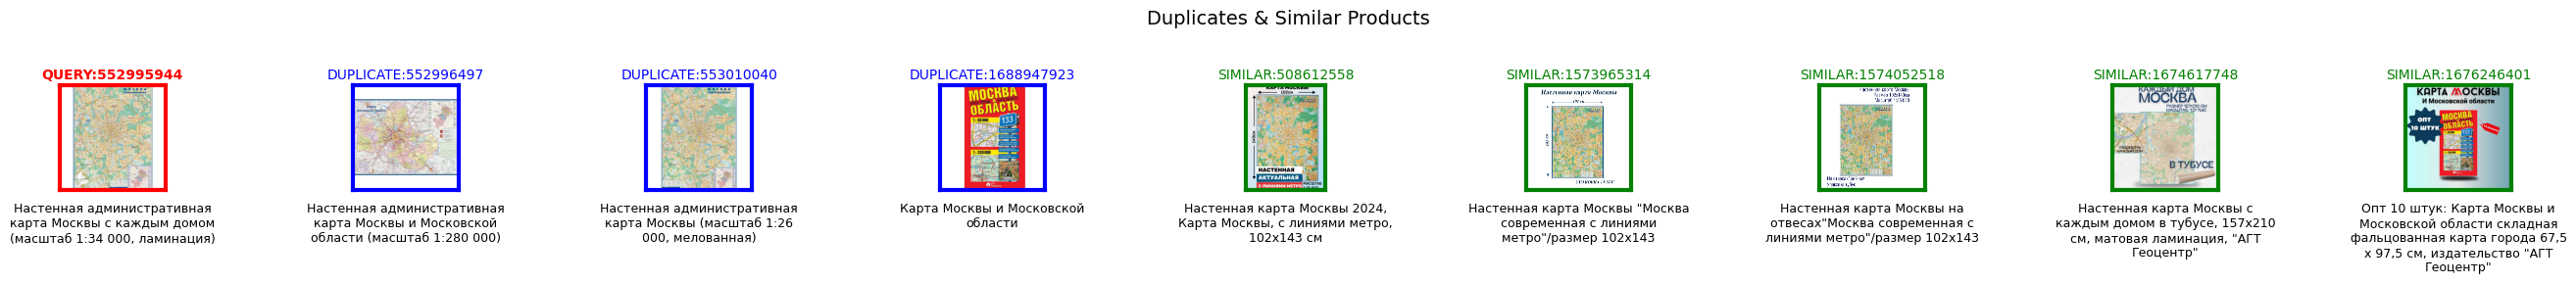

In [3621]:
from pathlib import Path
# IMAGES_DIR = Path('../competitors-xgb/data/images_OZ_geo_5500')

print(f'Results for \n{results_name}')
plot_relations_grids_by_group(
    merged_df,
    images_dir=IMAGES_DIR,
    image_col='image_name',
    sku_col='sku',
    dup_col='sku_duplicate',
    figsize_per_image=(3, 3),
    border_width=3,
)

# (optional) View results directly from a file

In [3622]:
prompt_names = list(prompts.keys())
for i, prompt_name in enumerate(prompt_names):
    print(f'({i})', prompt_name)

(0) default
(1) 1_0_use_double_quotes
(2) 2_0_ignore_symmetrical_entries
(3) 3_0_domain_knowledge_injection
(4) 3_1_explicit_domain_knowledge
(5) 3_2_strict_domain_knowledge
(6) 4_0_duplicate_products
(7) 5_0_duplicate_products_with_domain_knowledge
(8) 5_1_duplicate_products_with_domain_knowledge
(9) 5_2_duplicate_products_with_domain_knowledge
(10) 5_3_duplicate_products_with_domain_knowledge
(11) 5_4_duplicate_products_with_domain_knowledge
(12) 5_5_duplicate_products_with_domain_knowledge
(13) 6_0_duplicate_and_similar_products_with_domain_knowledge
(14) 6_1_duplicate_and_similar_products_with_domain_knowledge
(15) 6_2_duplicate_and_similar_products_with_domain_knowledge
(16) 6_3_duplicate_and_similar_products_with_domain_knowledge
(17) 6_4_duplicate_and_similar_products_with_domain_knowledge
(18) 6_5_duplicate_and_similar_products_with_domain_knowledge
(19) 7_duplicate_and_similar_products_concrete


In [3623]:
prompt_idx = 19

################################################################

prompt_name = prompt_names[prompt_idx]

import glob

file_prefix = Path('datasets/OZ_geo_5500/prompts') / prompt_name
results = os.listdir(file_prefix / 'results')
results = list(sorted(results))
for i, res in enumerate(results):
    print(f'({i})', res)

(0) 25-04-23_14-19-44_gpt-4.1-mini_temperature=1_seed=42_samples-per-pattern=5_pattern-set-id=0
(1) 25-04-23_14-35-45_gpt-4.1_temperature=1_seed=42_samples-per-pattern=5_pattern-set-id=0
(2) 25-04-23_14-56-35_gpt-4.1_temperature=1_seed=42_samples-per-pattern=5_pattern-set-id=1
(3) 25-04-23_14-57-32_gpt-4.1_temperature=1_seed=42_samples-per-pattern=5_pattern-set-id=2
(4) 25-04-23_15-03-25_gpt-4.1_temperature=1_seed=42_samples-per-pattern=5_pattern-set-id=2
(5) 25-04-23_15-07-25_gpt-4.1_temperature=1_seed=42_samples-per-pattern=5_pattern-set-id=2
(6) 25-04-23_15-08-26_gpt-4.1_temperature=0.7_seed=42_samples-per-pattern=5_pattern-set-id=2
(7) 25-04-23_15-19-40_gpt-4.1_temperature=0.7_seed=42_samples-per-pattern=5_pattern-set-id=2
(8) 25-04-23_15-23-29_gpt-4.1_temperature=0.7_seed=42_samples-per-pattern=5_pattern-set-id=2
(9) 25-04-23_15-28-00_gpt-4.1_temperature=0.7_seed=42_samples-per-pattern=5_pattern-set-id=2
(10) 25-04-23_15-30-09_gpt-4.1_temperature=0.7_seed=42_samples-per-pattern=5_

In [3624]:
chosen_result_idx = 63

##############################################

# Load result
chosen_result_name = results[chosen_result_idx]
file_path = file_prefix / 'results' / chosen_result_name / 'result.csv'
full_adj_df_loaded = pd.read_csv(file_path)

# Parse the string‐encoded lists back into real Python lists
import ast 

for col in ['sku_duplicate', 'sku_similar']:
    if col in full_adj_df_loaded.columns:
        full_adj_df_loaded[col] = (
            full_adj_df_loaded[col]
            .fillna('[]')               # NaN → "[]"
            .apply(ast.literal_eval)    # "[1,2]" → [1, 2]
        )

full_adj_df_loaded

,sku,name,description,url,seller,image_name,name_and_description,sku_duplicate,sku_similar
0,552995944,Настенная административная карта Москвы с кажд...,"Настенная карта Москвы с каждым домом, на одно...",https://www.ozon.ru/product/nastennaya-adminis...,Shop-Profit,6292453724.jpg,Настенная административная карта Москвы с кажд...,"[552996497, 553010040, 1688947923]","[508612558, 1573965314, 1574052518, 1674617748..."
1,1688947923,Карта Москвы и Московской области,Предлагаем вашему вниманию складную карту Моск...,https://www.ozon.ru/product/karta-moskvy-i-mos...,Store-M,7126371420.jpg,Карта Москвы и Московской области.\nПредлагаем...,"[552995944, 552996497, 553010040]",[]
2,553010040,Настенная административная карта Москвы (масшт...,Настенная административная карта Москвы с мато...,https://www.ozon.ru/product/nastennaya-adminis...,Shop-Profit,6292453771.jpg,Настенная административная карта Москвы (масшт...,"[552995944, 552996497, 1688947923]",[]
3,1674617748,Настенная карта Москвы с каждым домом в тубусе...,Представляем вашему вниманию складную фальцова...,https://www.ozon.ru/product/nastennaya-karta-m...,Store-M,7117428403.jpg,Настенная карта Москвы с каждым домом в тубусе...,[],"[508612558, 552995944, 1573965314, 1574052518,..."
4,552996497,Настенная административная карта Москвы и Моск...,Административная карта Москвы и Московской обл...,https://www.ozon.ru/product/nastennaya-adminis...,Shop-Profit,6292453695.jpg,Настенная административная карта Москвы и Моск...,"[552995944, 553010040, 1688947923]",[]
5,484577673,Настенная автомобильная карта Москвы на отвеса...,Настенная автомобильная карта Москвы. Размер к...,https://www.ozon.ru/product/nastennaya-avtomob...,"Издательство ""АГТ Геоцентр""",6247508752.jpg,Настенная автомобильная карта Москвы на отвеса...,[],[]
6,1574052518,"Настенная карта Москвы на отвесах""Москва совре...","Настенная карта Москвы ""Москва современная с л...",https://www.ozon.ru/product/nastennaya-karta-m...,атлас-карта,7027723401.jpg,"Настенная карта Москвы на отвесах""Москва совре...",[],"[508612558, 552995944, 1573965314, 1674617748,..."
7,1573965314,"Настенная карта Москвы ""Москва современная с л...","Настенная карта Москвы ""Москва современная с л...",https://www.ozon.ru/product/nastennaya-karta-m...,атлас-карта,7255044881.jpg,"Настенная карта Москвы ""Москва современная с л...",[],"[508612558, 552995944, 1574052518, 1674617748,..."
8,1676246401,Опт 10 штук: Карта Москвы и Московской области...,Представляем вашему вниманию складную фальцова...,https://www.ozon.ru/product/opt-10-shtuk-karta...,Store-M,7123115620.jpg,Опт 10 штук: Карта Москвы и Московской области...,[],"[508612558, 552995944, 1573965314, 1574052518,..."
9,508612558,"Настенная карта Москвы 2024, Карта Москвы, с л...",Настенная карта Москвы 2024 года издания — это...,https://www.ozon.ru/product/nastennaya-karta-m...,ИНТЕРТРЕЙД,7305941756.jpg,"Настенная карта Москвы 2024, Карта Москвы, с л...",[],"[552995944, 1573965314, 1574052518, 1674617748..."


## (optional) Visualize duplicates

In [3625]:
import pandas as pd

# 1. Extract the duplicates column from the full adjacency DataFrame
#    and rename sku_query → sku to match your subset.

if 'sku_query' not in full_adj_df_loaded.columns:
    merged_df_loaded = full_adj_df_loaded
else:
    if 'sku_similar' in full_adj_df_loaded.columns:
        dup_df = (
            full_adj_df_loaded[['sku_query', 'sku_duplicate', 'sku_similar']]
            .rename(columns={'sku_query': 'sku'})
        )
    else:
        dup_df = (
            full_adj_df_loaded[['sku_query', 'sku_duplicate',]]
            .rename(columns={'sku_query': 'sku'})
        )

    # 2. Left‑merge into your original chosen_subset_df
    merged_df_loaded = full_df.merge(
        dup_df,
        on='sku',
        how='left'
    )

    # 3. Replace any missing values (NaN) with an empty list,
    #    ensuring you don’t end up with nested lists.
    merged_df_loaded['sku_duplicate'] = merged_df_loaded['sku_duplicate'].apply(
        lambda x: x if isinstance(x, list) else []
    )

    sanity_check_sample = merged_df_loaded[merged_df_loaded['sku_duplicate'].map(len) > 0].sample(1)

    if 'sku_similar' in sanity_check_sample.columns:
        display(sanity_check_sample[['sku', 'sku_duplicate', 'sku_similar']])
    else:
        display(sanity_check_sample[['sku', 'sku_duplicate']])

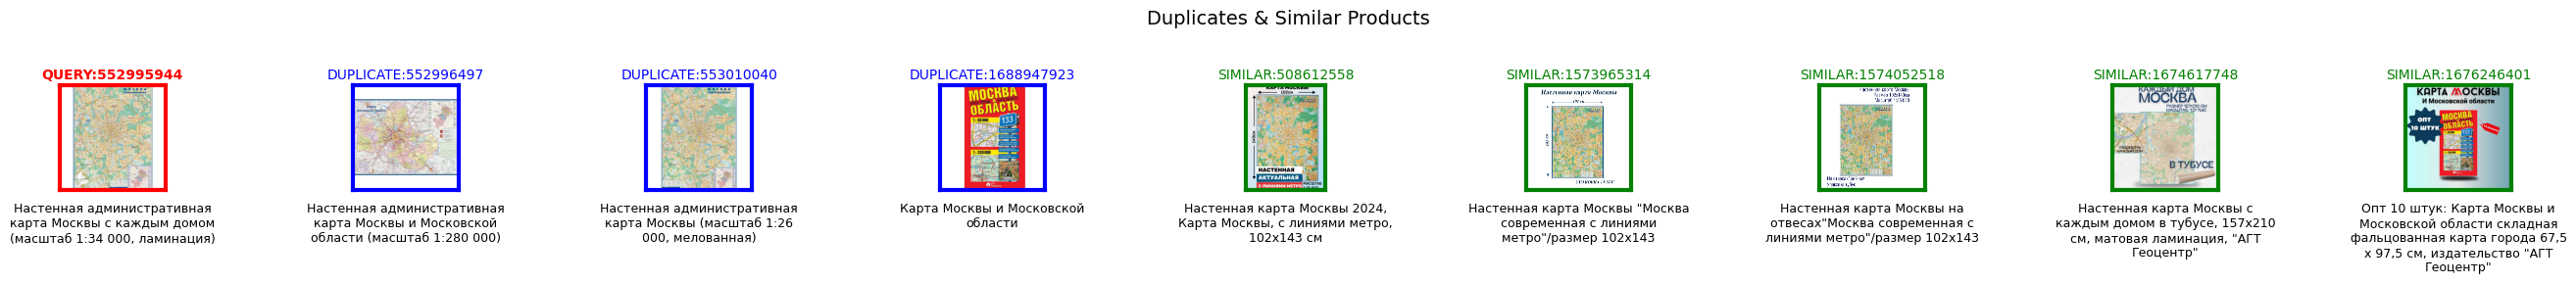

In [3626]:
from pathlib import Path
# IMAGES_DIR = Path('../competitors-xgb/data/images_OZ_geo_5500')

# plot_duplicates_grids_by_group(
#     merged_df_loaded,
#     images_dir=IMAGES_DIR,
#     image_col='image_name',
#     sku_col='sku',
#     dup_col='sku_duplicate',
#     figsize_per_image=(3, 3),
#     query_border_color='red',
#     query_border_width=3,
# )


plot_relations_grids_by_group(
    merged_df_loaded,
    images_dir=IMAGES_DIR,
    image_col='image_name',
    sku_col='sku',
    dup_col='sku_duplicate',
    figsize_per_image=(3, 3),
    border_width=3,
)